# **Complex Networks 1ACC0202-2520-14091**

Descubrimiento de patrones de co-utilización en la red bipartita clientes–servicios
**Trabajo Final**

**Profesor:** Carlos Fernando Montoya Cubas

**Grupo 7 | Integrantes**
| Nombre del Alumno                    |    Código      |
|--------------------------------------|----------------|
| Andrea Fabiana Garcia Napuri         | u202014068     |
| Nikole Scarlet Garcia Chavez         | u20181b618     |
| Luis Isaac Lazaro Machado    | u202323591     |  

Link video: https://www.youtube.com/watch?v=IALAZSU-WDg

# **1. Introducción del Notebook**
El análisis de redes permite representar y comprender las conexiones que surgen dentro de un sistema cuando distintos elementos interactúan entre sí. En este trabajo, se modela la relación entre clientes y servicios como una red bipartita, con el fin de identificar patrones de co-utilización y relaciones de complementariedad entre los servicios. A través de esta estructura, es posible observar cómo ciertos servicios actúan como puntos de enlace entre varios clientes, mientras que otros mantienen una participación más limitada, revelando diferencias en su nivel de conexión y alcance dentro del sistema.
La proyección de la red hacia el nivel servicio–servicio permite estudiar cómo las relaciones entre servicios configuran una estructura compleja, donde algunos actúan como nodos centrales o “puentes” que facilitan la conexión entre distintas partes del sistema. Esta dinámica refleja propiedades típicas de redes reales, como la existencia de servicios con alta concentración de vínculos o la formación de comunidades que agrupan servicios utilizados en conjunto. Asimismo, el análisis de estas conexiones contribuye a entender la difusión de interacciones dentro de la red y su resiliencia ante posibles cambios o pérdidas de enlaces.
El objetivo general de este trabajo es identificar y analizar los patrones de co-utilización entre servicios a partir de una red bipartita cliente–servicio y su proyección servicio–servicio. Para ello, se plantean los siguientes objetivos específicos:
- Construir la red bipartita cliente–servicio y proyectarla a una red servicio–servicio.
- Aplicar métricas globales y locales para describir la estructura de la red y las relaciones entre servicios.
- Detectar comunidades o agrupaciones de servicios con alta co-utilización.
- Interpretar los resultados en función de las propiedades estructurales observadas, identificando los servicios más conectados y las posibles relaciones de complementariedad.

El notebook se organiza en cuatro etapas principales:
1. **Carga y preparación de datos:** revisión, limpieza y normalización del dataset original, y generación de las tablas necesarias para redes bipartitas.
2. **Construcción de las redes:** creación de redes bipartitas cliente–servicio y cliente–tarea, y generación de sus proyecciones ponderadas (servicio–servicio y tarea–tarea).
3. **Análisis estructural y métricas:** cálculo de métricas globales, métricas locales, centralidades, comunidades, asortatividad, análisis de pesos y comparaciones estructurales.
4. **Predicción de enlaces y validaciones adicionales:** evaluación de métodos de link prediction sobre la red para validar patrones de co-utilización.

Cada sección del notebook desarrolla uno de estos pasos, integrando tanto análisis descriptivo como visualizaciones y resultados interpretados.

# 2. Carga, Preparación de Datos, EDA

## **Carga del dataset original**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('datosRed.xlsx')
print(df.head())

    AÑO PERSONA TIPO DE SERVICIO NOMBRE DE LA TAREA   MODALIDAD COMPLEJIDAD
0  2019    ID_1           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
1  2019    ID_2           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
2  2019    ID_3           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
3  2019    ID_4           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
4  2019    ID_5           SERV_1          TAREA_1.1  PRESENCIAL        BAJA


## **Revisión inicial**

In [ ]:
print("\nInformacion de la data: ")
print(df.info())
print("\nDescripcion estadistica: ")
print(df.describe())


Informacion de la data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AÑO                 10384 non-null  int64 
 1   PERSONA             10384 non-null  object
 2   TIPO DE SERVICIO    10384 non-null  object
 3   NOMBRE DE LA TAREA  10384 non-null  object
 4   MODALIDAD           10384 non-null  object
 5   COMPLEJIDAD         10384 non-null  object
dtypes: int64(1), object(5)
memory usage: 486.9+ KB
None

Descripcion estadistica: 
                AÑO
count  10384.000000
mean    2021.723132
std        1.275156
min     2019.000000
25%     2021.000000
50%     2022.000000
75%     2023.000000
max     2024.000000


### **Valores únicos**

In [ ]:
print("Valores únicos en MODALIDAD:")
print(df['MODALIDAD'].unique())

print("\nValores únicos en COMPLEJIDAD:")
print(df['COMPLEJIDAD'].unique())

print("\nValores únicos en NOMBRE DE LA TAREA:")
print(df['NOMBRE DE LA TAREA'].unique())

print("\nValores únicos en TIPO DE SERVICIO:")
print(df['TIPO DE SERVICIO'].unique())

print("\nValores únicos en AÑO:")
print(df['AÑO'].unique())

print("\nValores únicos en PERSONA:")
print(df['PERSONA'].unique())

Valores únicos en MODALIDAD:
['PRESENCIAL' 'VIRTUAL']

Valores únicos en COMPLEJIDAD:
['BAJA' 'MEDIANA' 'ALTA']

Valores únicos en NOMBRE DE LA TAREA:
['TAREA_1.1' 'TAREA_2.1' 'TAREA_3.1' 'TAREA_4.1' 'TAREA_5.1' 'TAREA_2.2'
 'TAREA_4.2' 'TAREA_1.2' 'TAREA_6.1' 'TAREA_7.1' 'TAREA_4.3' 'TAREA_3.2'
 'TAREA_3.3' 'TAREA_5.2' 'TAREA_4.4' 'TAREA_3.4' 'TAREA_5.3' 'TAREA_1.3']

Valores únicos en TIPO DE SERVICIO:
['SERV_1' 'SERV_2' 'SERV_3' 'SERV_4' 'SERV_5' 'SERV_6' 'SERV_7']

Valores únicos en AÑO:
[2019 2020 2021 2022 2023 2024]

Valores únicos en PERSONA:
['ID_1' 'ID_2' 'ID_3' ... 'ID_5088' 'ID_5089' 'ID_5090']


### **Limpieza de duplicados y datos inconsistentes**

In [ ]:
print("Duplicados totales:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicados totales después de eliminar duplicados:", df.duplicated().sum())
print("Cantidad total de registros ahora:", len(df))

Duplicados totales: 2429
Duplicados totales después de eliminar duplicados: 0
Cantidad total de registros ahora: 7955


### **Estadísticas generales**

Distribución por Año

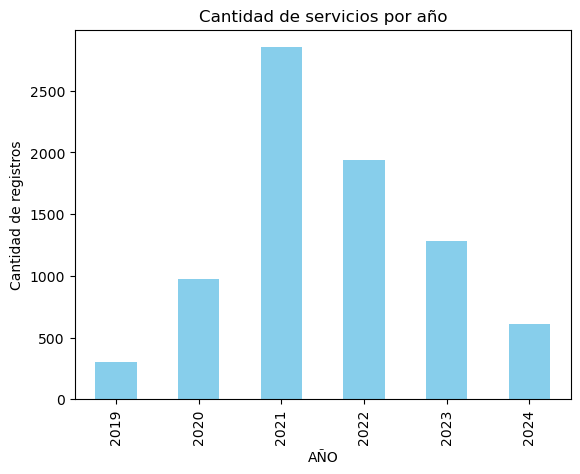

In [ ]:
import matplotlib.pyplot as plt
df['AÑO'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Cantidad de servicios por año")
plt.xlabel("AÑO")
plt.ylabel("Cantidad de registros")
plt.show()

Distribución del Tipo de Servicio

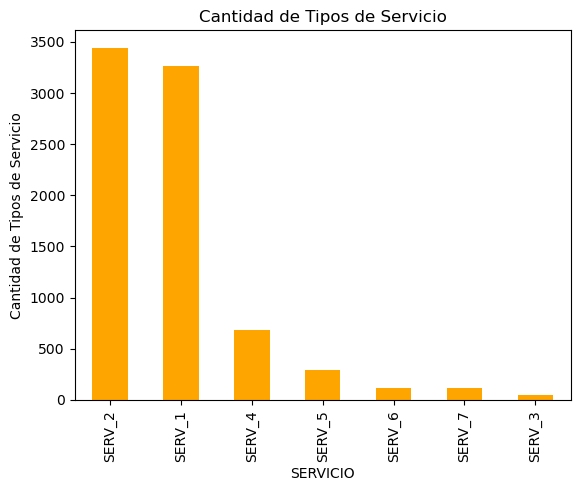

In [ ]:
df['TIPO DE SERVICIO'].value_counts().plot(kind='bar', color='orange')
plt.title("Cantidad de Tipos de Servicio")
plt.xlabel("SERVICIO")
plt.ylabel("Cantidad de Tipos de Servicio")
plt.show()

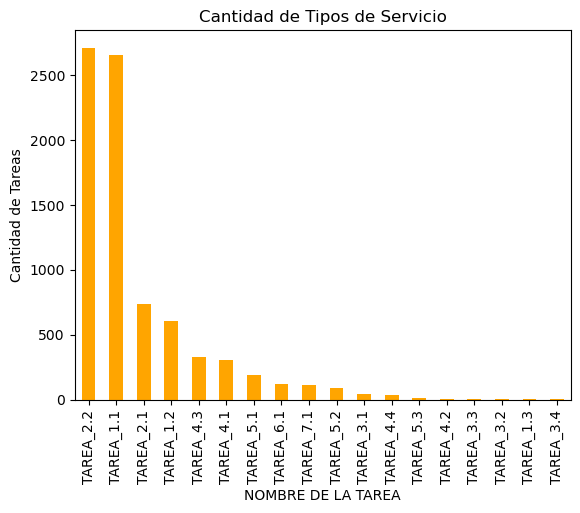

In [ ]:
df['NOMBRE DE LA TAREA'].value_counts().plot(kind='bar', color='orange')
plt.title("Cantidad de Tipos de Servicio")
plt.xlabel("NOMBRE DE LA TAREA")
plt.ylabel("Cantidad de Tareas")
plt.show()

Distribución por Modalidad

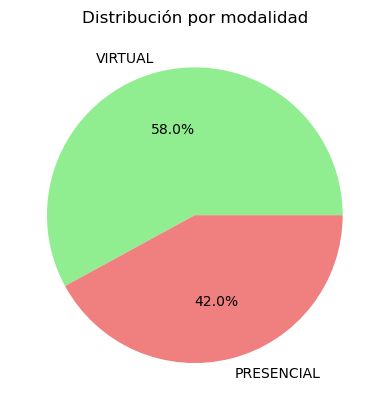

In [ ]:
df['MODALIDAD'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral']
)
plt.title("Distribución por modalidad")
plt.ylabel('')  # Quita la etiqueta vertical
plt.show()

Distribución por Complejidad

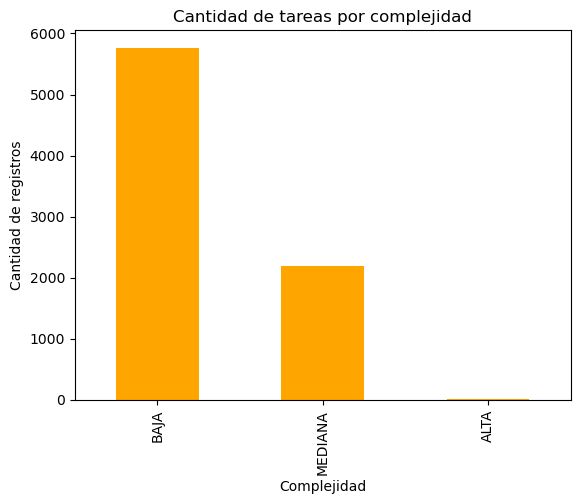

In [ ]:
df['COMPLEJIDAD'].value_counts().plot(kind='bar', color='orange')
plt.title("Cantidad de tareas por complejidad")
plt.xlabel("Complejidad")
plt.ylabel("Cantidad de registros")
plt.show()

Revisión de datos luego de la limpieza

In [ ]:
# Para variable numérica (AÑO)
print("Resumen de AÑO:")
print(df['AÑO'].describe())


Resumen de AÑO:
count    7955.000000
mean     2021.597234
std         1.221895
min      2019.000000
25%      2021.000000
50%      2021.000000
75%      2022.000000
max      2024.000000
Name: AÑO, dtype: float64


In [ ]:
# Para variables categóricas
print("Conteo por MODALIDAD:")
print(df['MODALIDAD'].value_counts())

print("\nConteo por COMPLEJIDAD:")
print(df['COMPLEJIDAD'].value_counts())

print("\nConteo por TIPO DE SERVICIO:")
print(df['TIPO DE SERVICIO'].value_counts().head(10))  # solo los 10 más frecuentes

print("\nConteo por NOMBRE DE LA TAREA:")
print(df['NOMBRE DE LA TAREA'].value_counts().head(10))  # solo los 10 más frecuentes

Conteo por MODALIDAD:
MODALIDAD
VIRTUAL       4610
PRESENCIAL    3345
Name: count, dtype: int64

Conteo por COMPLEJIDAD:
COMPLEJIDAD
BAJA       5764
MEDIANA    2184
ALTA          7
Name: count, dtype: int64

Conteo por TIPO DE SERVICIO:
TIPO DE SERVICIO
SERV_2    3441
SERV_1    3260
SERV_4     681
SERV_5     295
SERV_6     119
SERV_7     111
SERV_3      48
Name: count, dtype: int64

Conteo por NOMBRE DE LA TAREA:
NOMBRE DE LA TAREA
TAREA_2.2    2709
TAREA_1.1    2653
TAREA_2.1     732
TAREA_1.2     604
TAREA_4.3     331
TAREA_4.1     306
TAREA_5.1     188
TAREA_6.1     119
TAREA_7.1     111
TAREA_5.2      91
Name: count, dtype: int64


Analizando Cliente-Servicio

In [ ]:
personas_servicios = df.groupby('PERSONA')['TIPO DE SERVICIO'].nunique()
print(personas_servicios.describe())

count    5090.000000
mean        1.237917
std         0.609882
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: TIPO DE SERVICIO, dtype: float64


Gráfica Cliente-Servicio

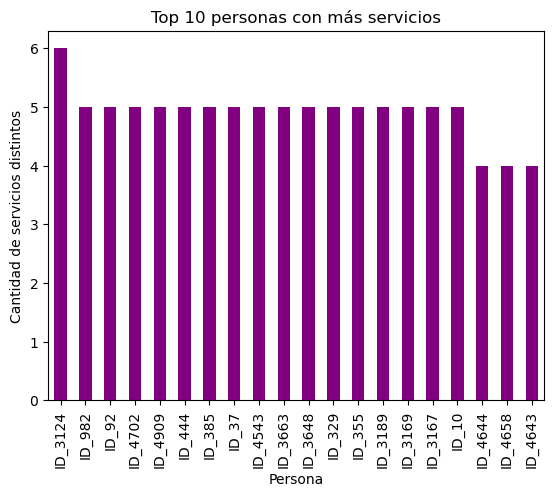

In [ ]:
top_personas = personas_servicios.sort_values(ascending=False).head(20)
top_personas.plot(kind='bar', color='purple')
plt.title("Top 10 personas con más servicios")
plt.xlabel("Persona")
plt.ylabel("Cantidad de servicios distintos")
plt.show()

Boxplot de Complejidad por Año

<Axes: xlabel='COMPLEJIDAD', ylabel='AÑO'>

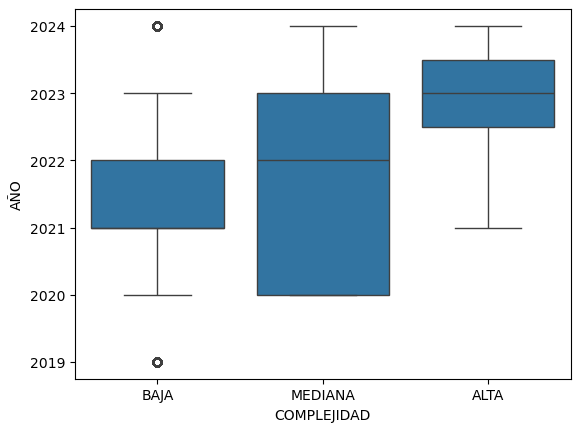

In [ ]:
import seaborn as sns
sns.boxplot(x='COMPLEJIDAD', y='AÑO', data=df)

Countplot de Año por Modalidad

<Axes: xlabel='AÑO', ylabel='count'>

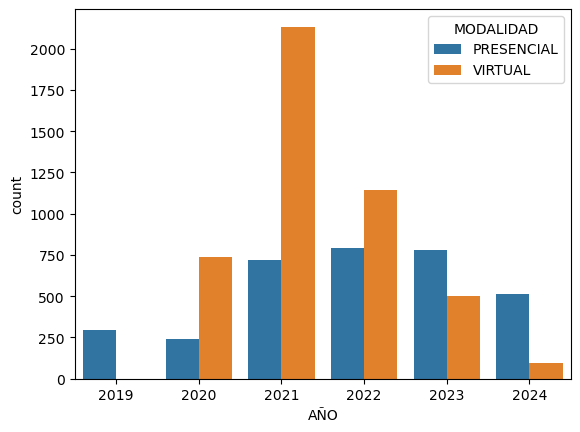

In [ ]:
sns.countplot(x='AÑO', hue='MODALIDAD', data=df)

Countplot de Complejidad por Modalidad

<Axes: xlabel='COMPLEJIDAD', ylabel='count'>

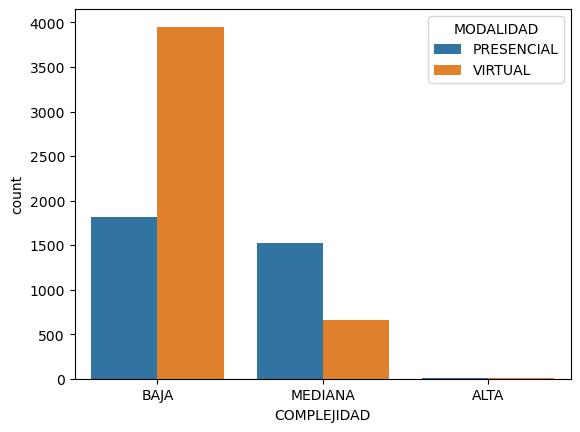

In [ ]:
sns.countplot(x='COMPLEJIDAD', hue='MODALIDAD', data=df)

Countplot de Tipo de Servicio por Complejidad

<Axes: xlabel='TIPO DE SERVICIO', ylabel='count'>

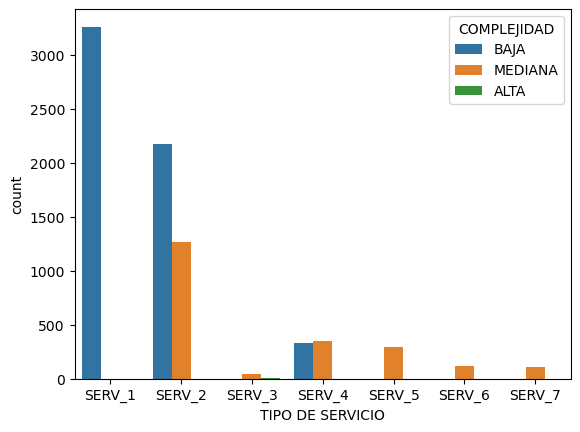

In [ ]:
sns.countplot(x='TIPO DE SERVICIO', hue='COMPLEJIDAD', data=df)

Diagrama de Correlación
-> Convertimos a numérico la complejidad

In [ ]:
mapa_complejidad = {'BAJA': 1, 'MEDIA': 2, 'ALTA': 3}
df['COMPLEJIDAD_NUM'] = df['COMPLEJIDAD'].map(mapa_complejidad)

df_resumen = df.groupby('PERSONA', as_index=False).agg({
    'TIPO DE SERVICIO': 'nunique',   # cuántos servicios distintos usa cada persona
    'NOMBRE DE LA TAREA': 'nunique', # cuántas tareas distintas tiene
    'COMPLEJIDAD_NUM': 'mean',       # nivel promedio de complejidad
    'AÑO': 'mean'                    # año promedio de actividad
})

Graficamos el Diagrama

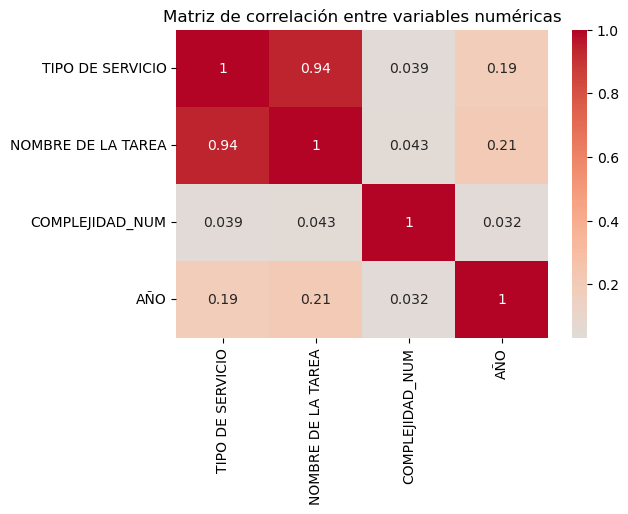

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula correlación solo entre columnas numéricas
corr = df_resumen[['TIPO DE SERVICIO', 'NOMBRE DE LA TAREA', 'COMPLEJIDAD_NUM', 'AÑO']].corr()

# Mostrarla
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Relación tipo Servicio, tarea y complejidad

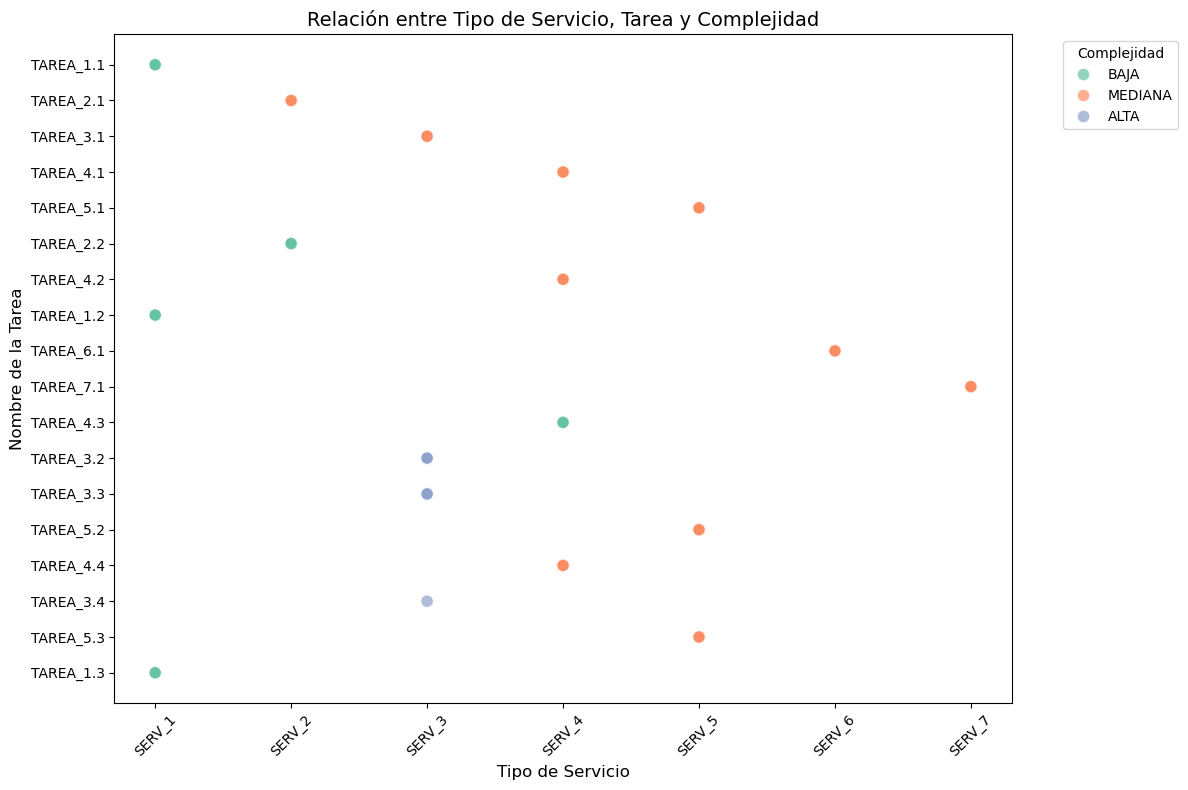

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Convertimos la complejidad en números o categorías ordenadas
mapa = {'BAJA': 1, 'MEDIANA': 2, 'ALTA': 3}
df['COMPLEJIDAD_NUM'] = df['COMPLEJIDAD'].map(mapa)

# Paso 2: Creamos el gráfico
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='TIPO DE SERVICIO',
    y='NOMBRE DE LA TAREA',
    hue='COMPLEJIDAD',       # color según complejidad original
    palette={'BAJA': '#66c2a5', 'MEDIANA': '#fc8d62', 'ALTA': '#8da0cb'},
    alpha=0.7,
    s=80                     # tamaño de los puntos
)

# Paso 3: Ajustes visuales
plt.title('Relación entre Tipo de Servicio, Tarea y Complejidad', fontsize=14)
plt.xlabel('Tipo de Servicio', fontsize=12)
plt.ylabel('Nombre de la Tarea', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Complejidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **3. Construcción de la Red**

## **3.1. Red Bipartita Cliente–Servicio**

### **Construcción del grafo bipartito**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pickle
import os

In [ ]:
B = nx.Graph()
clientes = df["PERSONA"].unique()
servicios = df["TIPO DE SERVICIO"].unique()

B.add_nodes_from(clientes, bipartite=0)
B.add_nodes_from(servicios, bipartite=1)
B.add_edges_from(zip(df["PERSONA"], df["TIPO DE SERVICIO"]))

print("Red bipartita creada:")
print(f" - Nodos totales: {B.number_of_nodes()}")
print(f" - Enlaces totales: {B.number_of_edges()}")

Red bipartita creada:
 - Nodos totales: 5097
 - Enlaces totales: 6301


### **Visualización preliminar**

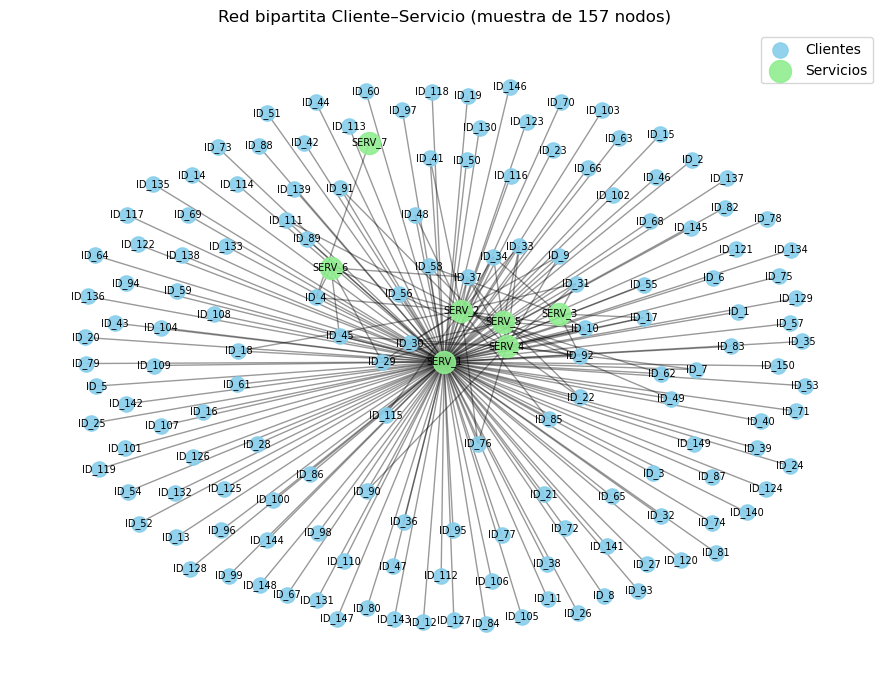

Figura guardada en: figuras\bipartita\red_bipartita_cliente_servicio_muestra.png


In [ ]:
# Visualización de una submuestra de la red bipartita

# Número de clientes y servicios a mostrar (ajusta según tamaño)
num_clientes_muestra = 150
num_servicios_muestra = 150

# Selecciona una muestra de ambos tipos
clientes_muestra = list(clientes)[:num_clientes_muestra]
servicios_muestra = list(servicios)[:num_servicios_muestra]

# Incluye solo las conexiones entre ellos
nodos_muestra = clientes_muestra + servicios_muestra
B_sub = B.subgraph(nodos_muestra).copy()

# Layout bipartito para mayor claridad
pos_sub = nx.spring_layout(B_sub, seed=42, k=0.6)

# Crear carpeta si no existe
carpeta_fig_bipartita = os.path.join("figuras", "bipartita")
os.makedirs(carpeta_fig_bipartita, exist_ok=True)

# Dibujo
plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=clientes_muestra,
                       node_color='skyblue', node_size=120, label='Clientes', alpha=0.9)
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=servicios_muestra,
                       node_color='lightgreen', node_size=250, label='Servicios', alpha=0.9)
nx.draw_networkx_edges(B_sub, pos_sub, alpha=0.4)
nx.draw_networkx_labels(B_sub, pos_sub, font_size=7)

plt.title(f"Red bipartita Cliente–Servicio (muestra de {len(B_sub.nodes())} nodos)")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.tight_layout()

# Guardar figura
ruta_figura = os.path.join(carpeta_fig_bipartita, "red_bipartita_cliente_servicio_muestra.png")
plt.savefig(ruta_figura, dpi=300, bbox_inches="tight")
plt.show()

print(f"Figura guardada en: {ruta_figura}")

## **3.2. Proyección Servicio–Servicio**

- Criterio: Dos servicios estarán conectados si al menos un cliente ha utilizado ambos servicios.
- Tipo de red resultante: ponderada (por número de clientes en común).

### **Proyección ponderada**

In [ ]:
servicios_set = {n for n, d in B.nodes(data=True) if d["bipartite"] == 1}
G_servicios = bipartite.weighted_projected_graph(B, servicios_set)

print("Red servicio–servicio (completa):")
print(f" - Nodos: {G_servicios.number_of_nodes()}")
print(f" - Enlaces: {G_servicios.number_of_edges()}")

Red servicio–servicio (completa):
 - Nodos: 7
 - Enlaces: 20


### **Filtro por umbral de peso**

In [ ]:
umbral = 20  # se puede ajustar este valor según densidad
G_servicios_filtrada = nx.Graph(
    ((u, v, d) for u, v, d in G_servicios.edges(data=True) if d.get("weight", 0) >= umbral)
)

print(f"Red servicio–servicio (filtrada, peso >= {umbral}):")
print(f" - Nodos: {G_servicios_filtrada.number_of_nodes()}")
print(f" - Enlaces: {G_servicios_filtrada.number_of_edges()}")

Red servicio–servicio (filtrada, peso >= 20):
 - Nodos: 5
 - Enlaces: 10


### **Visualización de red completa y filtrada**

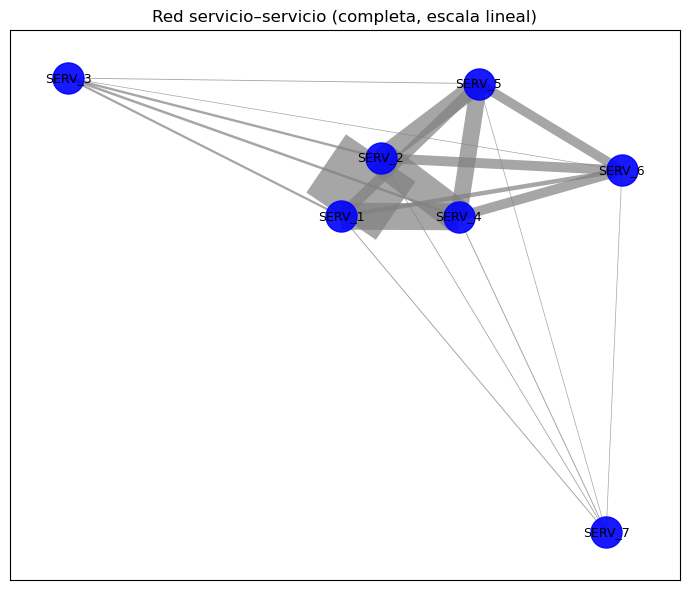

Figura guardada en: figuras\servicios\completa\red_servicio_servicio_completa_lineal.png


In [ ]:
# Crear carpeta si no existe
carpeta_fig_servicios = os.path.join("figuras", "servicios", "completa")
os.makedirs(carpeta_fig_servicios, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_full = nx.spring_layout(G_servicios, seed=42, k=0.4)
edge_weights_full = [d.get("weight", 1) for _, _, d in G_servicios.edges(data=True)]
edge_widths_full = [max(0.5, w * 0.1) for w in edge_weights_full]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_servicios, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_servicios, pos_full, width=edge_widths_full, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_servicios, pos_full, font_size=9)

plt.title("Red servicio–servicio (completa, escala lineal)")
plt.tight_layout()

# Guardar figura antes de mostrar
ruta_figura_servicios = os.path.join(carpeta_fig_servicios, "red_servicio_servicio_completa_lineal.png")
plt.savefig(ruta_figura_servicios, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_servicios}")

### Red servicio–servicio (filtrada, escala lineal)

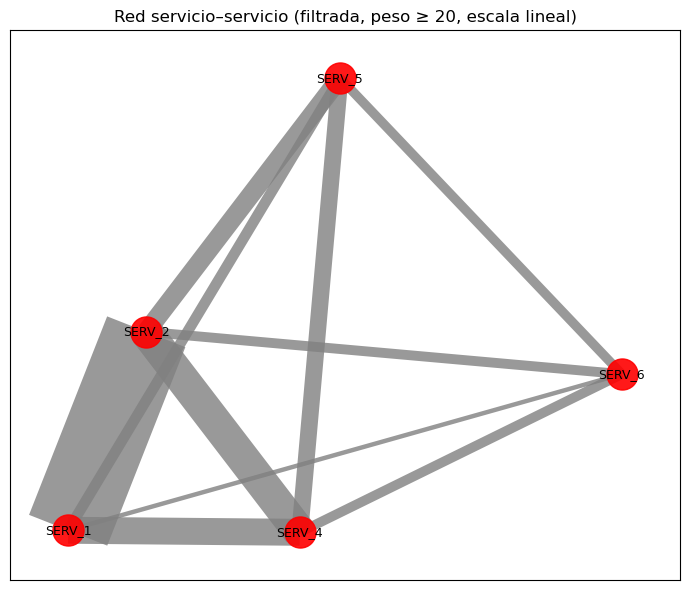

Figura guardada en: figuras\servicios\filtrada\red_servicio_servicio_filtrada_lineal.png


In [ ]:
# Crear carpetas si no existen
carpeta_base = os.path.join("figuras", "servicios", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_filt = {n: pos_full[n] for n in G_servicios_filtrada.nodes() if n in pos_full}

edge_weights_filt = [d.get("weight", 1) for _, _, d in G_servicios_filtrada.edges(data=True)]
edge_widths_filt = [max(0.5, w * 0.1) for w in edge_weights_filt]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_servicios_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_servicios_filtrada, pos_filt, width=edge_widths_filt, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_servicios_filtrada, pos_filt, font_size=9)

plt.title(f"Red servicio–servicio (filtrada, peso ≥ {umbral}, escala lineal)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_servicio_servicio_filtrada_lineal.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_filt_lineal}")

### Red servicio–servicio (completa, escala logarítmica)

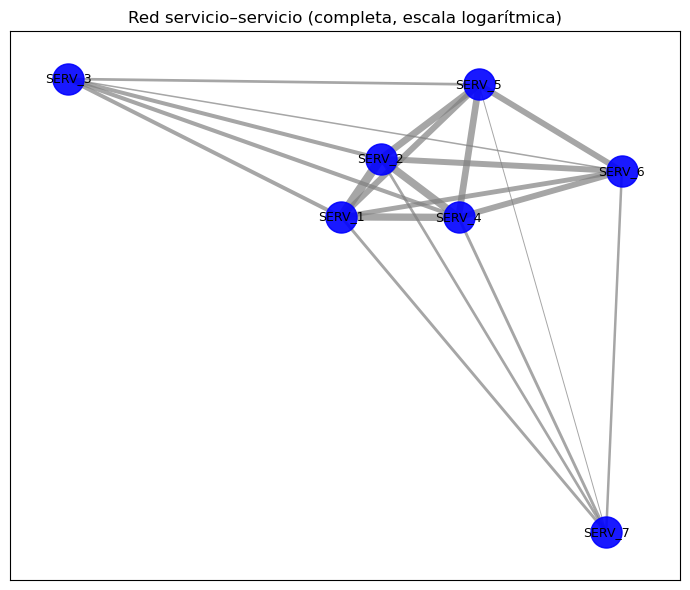

Figura guardada en: figuras\servicios\completa\red_servicio_servicio_completa_log.png


In [ ]:
carpeta_fig_servicios = os.path.join("figuras", "servicios", "completa")
os.makedirs(carpeta_fig_servicios, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_full_log = [np.log1p(w) for w in edge_weights_full]  # Escala log(1+w)
nx.draw_networkx_nodes(G_servicios, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_servicios, pos_full, width=edge_widths_full_log, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_servicios, pos_full, font_size=9)

plt.title("Red servicio–servicio (completa, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_servicios = os.path.join(carpeta_fig_servicios, "red_servicio_servicio_completa_log.png")
plt.savefig(ruta_figura_servicios, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_servicios}")

### Red servicio–servicio (filtrada, escala logarítmica)

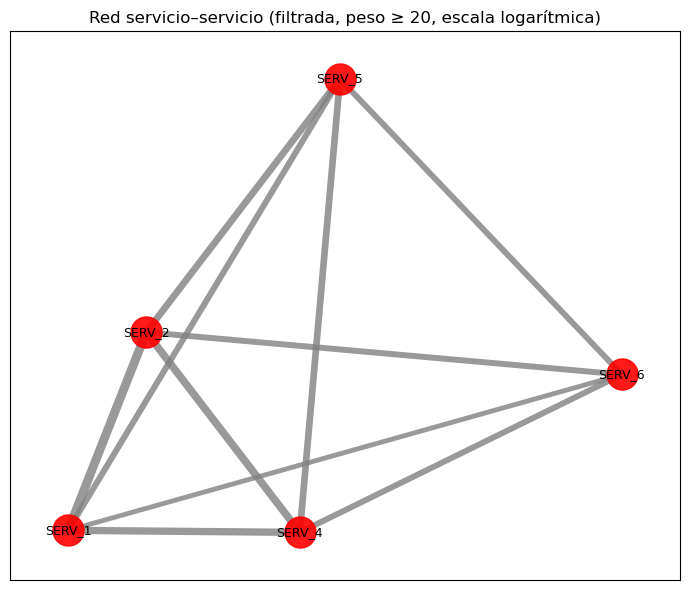

Figura guardada en: figuras\servicios\completa\red_servicio_servicio_completa_log.png


In [ ]:
carpeta_base = os.path.join("figuras", "servicios", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_filt_log = [np.log1p(w) for w in edge_weights_filt]

nx.draw_networkx_nodes(G_servicios_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_servicios_filtrada, pos_filt, width=edge_widths_filt_log, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_servicios_filtrada, pos_filt, font_size=9)

plt.title(f"Red servicio–servicio (filtrada, peso ≥ {umbral}, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_servicio_servicio_filtrada_log.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_servicios}")

En la versión con peso lineal, los valores representan directamente la fuerza real de las conexiones, pero como los pesos varían bastante (de 2 a 605), las aristas más grandes dominan el gráfico y las más pequeñas casi no se notan. Por eso, decidimos incorporar también una versión con escala logarítmica, que reduce esas diferencias y permite visualizar mejor la estructura general de la red, mostrando más conexiones y haciendo que el gráfico sea más fácil de interpretar. La única desventaja es que los valores ya no reflejan el peso real, sino su logaritmo.

### Ventanas temporales (por año)

- Se construyen redes bipartitas y proyecciones por año para estudiar cambios en el tiempo.

In [ ]:
redes_por_año = {}
for año, grupo in df.groupby("AÑO"):
    B_año = nx.Graph()
    clientes_año = grupo["PERSONA"].unique()
    servicios_año = grupo["TIPO DE SERVICIO"].unique()

    B_año.add_nodes_from(clientes_año, bipartite=0)
    B_año.add_nodes_from(servicios_año, bipartite=1)
    B_año.add_edges_from(zip(grupo["PERSONA"], grupo["TIPO DE SERVICIO"]))

    # Proyección servicio–servicio ponderada
    G_servicios_año = bipartite.weighted_projected_graph(B_año, servicios_año)
    redes_por_año[año] = G_servicios_año

    print(f"Año {año}: {G_servicios_año.number_of_nodes()} nodos, {G_servicios_año.number_of_edges()} enlaces")

Año 2019: 1 nodos, 0 enlaces
Año 2020: 7 nodos, 13 enlaces
Año 2021: 7 nodos, 18 enlaces
Año 2022: 7 nodos, 13 enlaces
Año 2023: 7 nodos, 15 enlaces
Año 2024: 7 nodos, 14 enlaces


In [ ]:
# Ejemplo: inspeccionamos la red del 2024
G_2024 = redes_por_año.get(2024)
if G_2024:
    print("Ejemplo (2024): algunos enlaces con peso")
    for u, v, data in list(G_2024.edges(data=True))[:10]:
        print(f"{u} -- {v} (peso={data['weight']})")

Ejemplo (2024): algunos enlaces con peso
SERV_3 -- SERV_4 (peso=1)
SERV_4 -- SERV_2 (peso=33)
SERV_4 -- SERV_5 (peso=37)
SERV_4 -- SERV_7 (peso=2)
SERV_4 -- SERV_6 (peso=13)
SERV_4 -- SERV_1 (peso=19)
SERV_1 -- SERV_2 (peso=42)
SERV_1 -- SERV_6 (peso=8)
SERV_1 -- SERV_5 (peso=15)
SERV_2 -- SERV_6 (peso=14)


Se guardan las redes (completas, filtradas y temporales)

In [ ]:
# Definir carpetas de salida
carpeta_general = "redes_guardadas"
carpeta_principal = os.path.join(carpeta_general, "principales")
carpeta_por_año = os.path.join(carpeta_general, "por_año")

# Crear carpetas si no existen
os.makedirs(carpeta_principal, exist_ok=True)
os.makedirs(carpeta_por_año, exist_ok=True)

# Archivos principales
out_files = {
    "bipartita": os.path.join(carpeta_principal, "red_bipartita_cliente_servicio.pkl"),
    "servicios_completa": os.path.join(carpeta_principal, "red_servicio_servicio_completa.pkl"),
    "servicios_filtrada": os.path.join(carpeta_principal, "red_servicio_servicio_filtrada.pkl")
}

# Guardar las redes principales
with open(out_files["bipartita"], "wb") as f:
    pickle.dump(B, f)
with open(out_files["servicios_completa"], "wb") as f:
    pickle.dump(G_servicios, f)
with open(out_files["servicios_filtrada"], "wb") as f:
    pickle.dump(G_servicios_filtrada, f)

# Guardar las redes por año
for año, red in redes_por_año.items():
    ruta_año = os.path.join(carpeta_por_año, f"red_servicio_servicio_{año}.pkl")
    with open(ruta_año, "wb") as f:
        pickle.dump(red, f)

# Mostrar resumen
print("Redes guardadas con éxito.")
print(f"Carpeta principal: {carpeta_general}\n")

for carpeta in [carpeta_principal, carpeta_por_año]:
    print(f"Contenido de '{carpeta}':")
    for file in os.listdir(carpeta):
        print("   -", file)


Redes guardadas con éxito.
Carpeta principal: redes_guardadas

Contenido de 'redes_guardadas\principales':
   - red_bipartita_cliente_servicio.pkl
   - red_servicio_servicio_completa.pkl
   - red_servicio_servicio_filtrada.pkl
Contenido de 'redes_guardadas\por_año':
   - red_servicio_servicio_2019.pkl
   - red_servicio_servicio_2020.pkl
   - red_servicio_servicio_2021.pkl
   - red_servicio_servicio_2022.pkl
   - red_servicio_servicio_2023.pkl
   - red_servicio_servicio_2024.pkl


| Archivo                                  | Contiene                                  | Uso                                           |
| ---------------------------------------- | ----------------------------------------- | --------------------------------------------- |
| `red_bipartita_cliente_servicio.pkl` | Red completa Cliente–Servicio             | Fuente base para análisis posteriores         |
| `red_servicio_servicio_completa.pkl`          | Red proyectada completa Servicio–Servicio | Para analizar relaciones entre servicios      |
| `red_servicio_servicio_filtrada.pkl` | Versión simplificada (peso ≥ 2)           | Ideal para visualización o métricas sin ruido |
| `red_servicio_servicio_año.pkl` | Red proyectada completa Servicio-Servicio de tal año           | Para comparar evolución temporal |



## **3.3. Red Bipartita Cliente–Tarea**

### **Construcción del grafo bipartito**

In [ ]:
B = nx.Graph()
clientes = df["PERSONA"].unique()
tareas = df["NOMBRE DE LA TAREA"].unique()

B.add_nodes_from(clientes, bipartite=0)
B.add_nodes_from(tareas, bipartite=1)
B.add_edges_from(zip(df["PERSONA"], df["NOMBRE DE LA TAREA"]))

print("Red bipartita creada:")
print(f" - Nodos totales: {B.number_of_nodes()}")
print(f" - Enlaces totales: {B.number_of_edges()}")

Red bipartita creada:
 - Nodos totales: 5108
 - Enlaces totales: 6900


### Visualización de una submuestra de la red bipartita

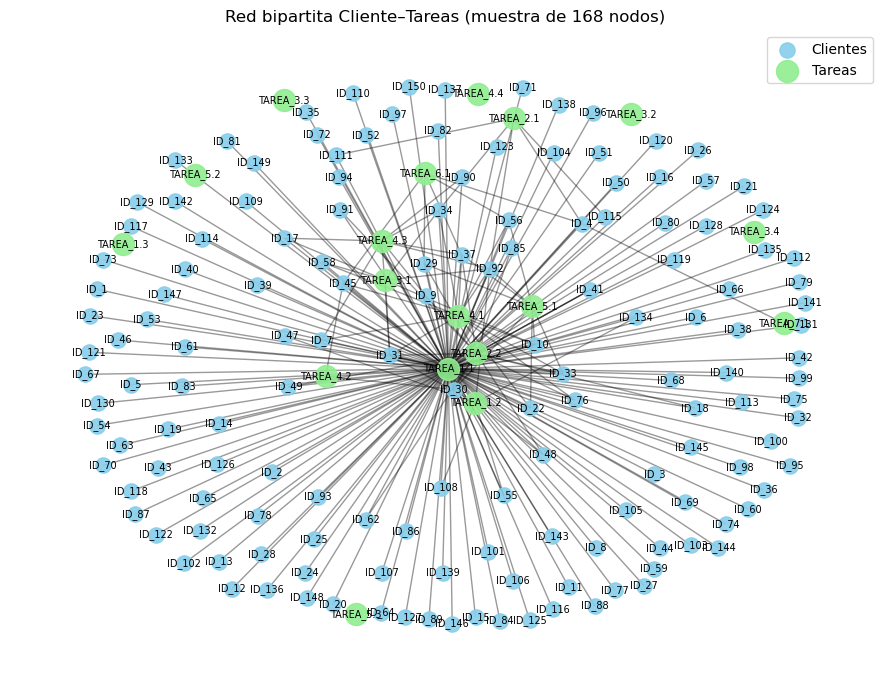

Figura guardada en: figuras\bipartita\red_bipartita_cliente_tareas_muestra.png


In [ ]:
# Número de clientes y tareas a mostrar (ajusta según tamaño)
num_clientes_muestra = 150
num_tareas_muestra = 150

# Selecciona una muestra de ambos tipos
clientes_muestra = list(clientes)[:num_clientes_muestra]
tareas_muestra = list(tareas)[:num_tareas_muestra]

# Incluye solo las conexiones entre ellos
nodos_muestra = clientes_muestra + tareas_muestra
B_sub = B.subgraph(nodos_muestra).copy()

# Layout bipartito para mayor claridad
pos_sub = nx.spring_layout(B_sub, seed=42, k=0.6)

# Crear carpeta si no existe
carpeta_fig_bipartita = os.path.join("figuras", "bipartita")
os.makedirs(carpeta_fig_bipartita, exist_ok=True)

# Dibujo
plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=clientes_muestra,
                       node_color='skyblue', node_size=120, label='Clientes', alpha=0.9)
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=tareas_muestra,
                       node_color='lightgreen', node_size=250, label='Tareas', alpha=0.9)
nx.draw_networkx_edges(B_sub, pos_sub, alpha=0.4)
nx.draw_networkx_labels(B_sub, pos_sub, font_size=7)

plt.title(f"Red bipartita Cliente–Tareas (muestra de {len(B_sub.nodes())} nodos)")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.tight_layout()

# Guardar figura
ruta_figura = os.path.join(carpeta_fig_bipartita, "red_bipartita_cliente_tareas_muestra.png")
plt.savefig(ruta_figura, dpi=300, bbox_inches="tight")
plt.show()

print(f"Figura guardada en: {ruta_figura}")

### **Proyección tarea–tarea**
- Criterio: Dos tareas estarán conectadas si al menos un cliente ha utilizado ambos tareas.
- Tipo de red resultante: ponderada (por número de clientes en común).

In [ ]:
tareas_set = {n for n, d in B.nodes(data=True) if d["bipartite"] == 1}
G_tareas = bipartite.weighted_projected_graph(B, tareas_set)

print("Red tarea-tarea (completa):")
print(f" - Nodos: {G_tareas.number_of_nodes()}")
print(f" - Enlaces: {G_tareas.number_of_edges()}")

Red tarea-tarea (completa):
 - Nodos: 18
 - Enlaces: 100


Filtrado por peso para eliminar enlaces débiles

In [ ]:
umbral = 20  # se puede ajustar este valor según densidad
G_tareas_filtrada = nx.Graph(
    ((u, v, d) for u, v, d in G_tareas.edges(data=True) if d.get("weight", 0) >= umbral)
)

print(f"Red tarea-tarea (filtrada, peso >= {umbral}):")
print(f" - Nodos: {G_tareas_filtrada.number_of_nodes()}")
print(f" - Enlaces: {G_tareas_filtrada.number_of_edges()}")

Red tarea-tarea (filtrada, peso >= 20):
 - Nodos: 10
 - Enlaces: 39


### **Visualización de la red tarea–tarea**

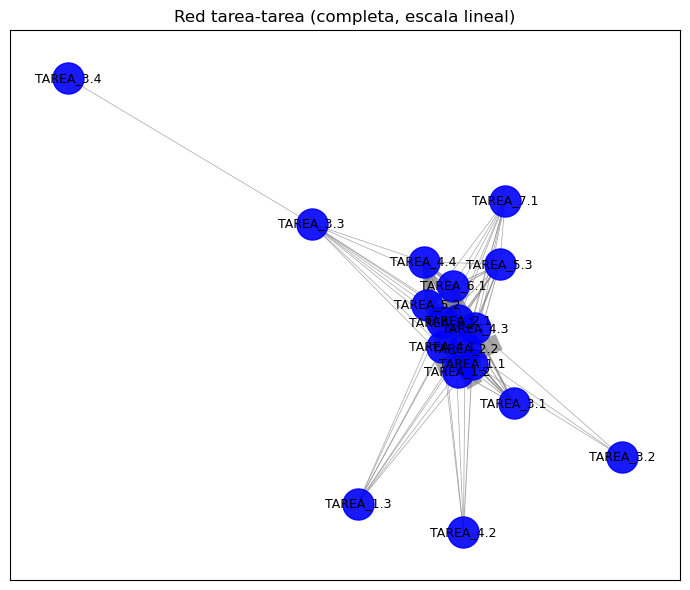

Figura guardada en: figuras\tareas\completa\red_tarea_tarea_completa_lineal.png


In [ ]:
# Crear carpeta si no existe
carpeta_fig_tareas = os.path.join("figuras", "tareas", "completa")
os.makedirs(carpeta_fig_tareas, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_full = nx.spring_layout(G_tareas, seed=42, k=0.4)
edge_weights_full = [d.get("weight", 1) for _, _, d in G_tareas.edges(data=True)]
edge_widths_full = [max(0.5, w * 0.1) for w in edge_weights_full]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_tareas, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_tareas, pos_full, width=edge_widths_full, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_tareas, pos_full, font_size=9)

plt.title("Red tarea-tarea (completa, escala lineal)")
plt.tight_layout()

# Guardar figura antes de mostrar
ruta_figura_tareas = os.path.join(carpeta_fig_tareas, "red_tarea_tarea_completa_lineal.png")
plt.savefig(ruta_figura_tareas, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_tareas}")

### Red tarea-tarea (filtrada, escala lineal)

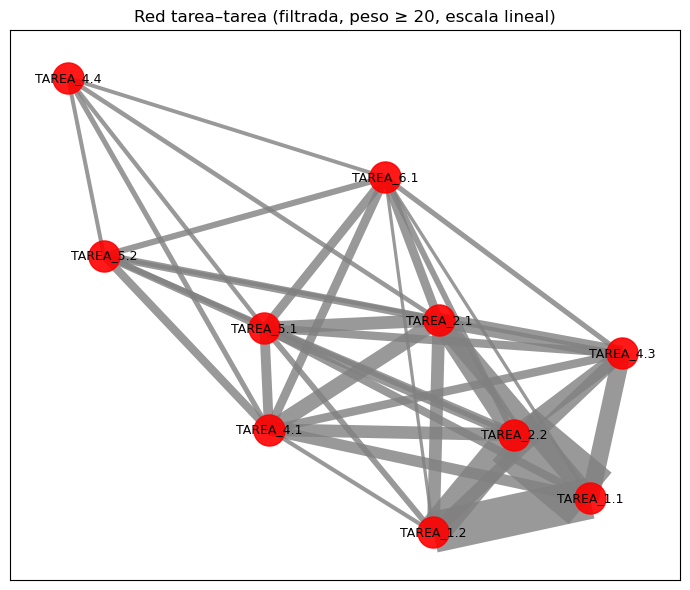

Figura guardada en: figuras\tareas\filtrada\red_tarea_tarea_filtrada_lineal.png


In [ ]:
# Crear carpetas si no existen
carpeta_base = os.path.join("figuras", "tareas", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_filt = {n: pos_full[n] for n in G_tareas_filtrada.nodes() if n in pos_full}

edge_weights_filt = [d.get("weight", 1) for _, _, d in G_tareas_filtrada.edges(data=True)]
edge_widths_filt = [max(0.5, w * 0.1) for w in edge_weights_filt]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_tareas_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_tareas_filtrada, pos_filt, width=edge_widths_filt, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_tareas_filtrada, pos_filt, font_size=9)

plt.title(f"Red tarea–tarea (filtrada, peso ≥ {umbral}, escala lineal)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_tarea_tarea_filtrada_lineal.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_filt_lineal}")

### Red tarea–tarea (completa, escala logarítmica)

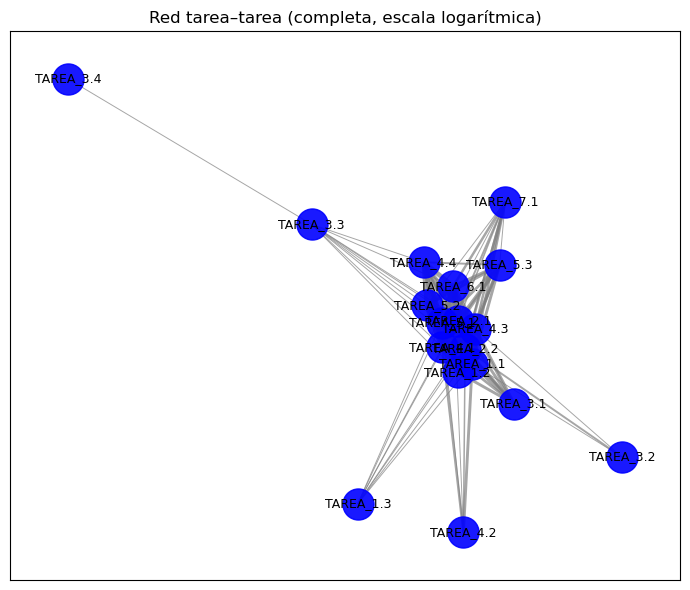

Figura guardada en: figuras\tareas\completa\red_tarea_tarea_completa_log.png


In [ ]:
carpeta_fig_tareas = os.path.join("figuras", "tareas", "completa")
os.makedirs(carpeta_fig_tareas, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_full_log = [np.log1p(w) for w in edge_weights_full]  # Escala log(1+w)
nx.draw_networkx_nodes(G_tareas, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_tareas, pos_full, width=edge_widths_full_log, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_tareas, pos_full, font_size=9)

plt.title("Red tarea–tarea (completa, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_tareas = os.path.join(carpeta_fig_tareas, "red_tarea_tarea_completa_log.png")
plt.savefig(ruta_figura_tareas, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_tareas}")

### Red tarea–tarea (filtrada, escala logarítmica)

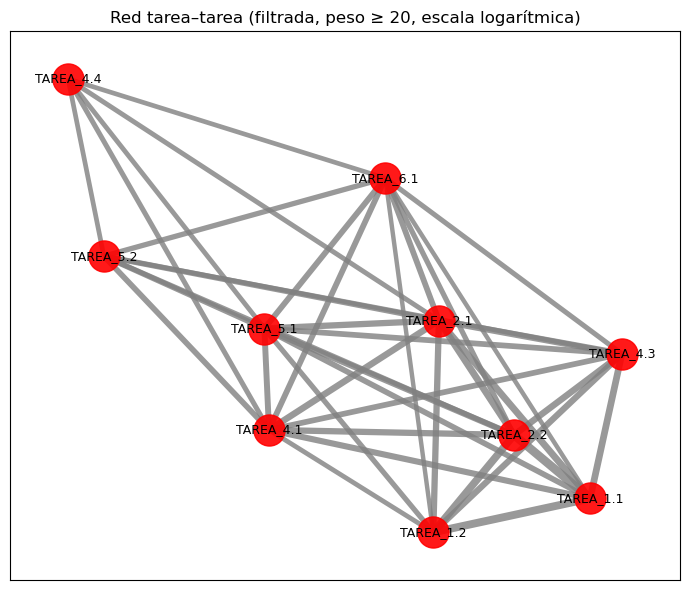

Figura guardada en: figuras\tareas\completa\red_tarea_tarea_completa_log.png


In [ ]:
carpeta_base = os.path.join("figuras", "tareas", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_filt_log = [np.log1p(w) for w in edge_weights_filt]

nx.draw_networkx_nodes(G_tareas_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_tareas_filtrada, pos_filt, width=edge_widths_filt_log, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_tareas_filtrada, pos_filt, font_size=9)

plt.title(f"Red tarea–tarea (filtrada, peso ≥ {umbral}, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_tarea_tarea_filtrada_log.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_tareas}")

En la versión con peso lineal, los valores representan directamente la fuerza real de las conexiones, pero como los pesos varían bastante (de 2 a 605), las aristas más grandes dominan el gráfico y las más pequeñas casi no se notan. Por eso, decidimos incorporar también una versión con escala logarítmica, que reduce esas diferencias y permite visualizar mejor la estructura general de la red, mostrando más conexiones y haciendo que el gráfico sea más fácil de interpretar. La única desventaja es que los valores ya no reflejan el peso real, sino su logaritmo.

### Ventanas temporales (por año)

In [ ]:
redes_por_año = {}
for año, grupo in df.groupby("AÑO"):
    B_año = nx.Graph()
    clientes_año = grupo["PERSONA"].unique()
    tareas_año = grupo["NOMBRE DE LA TAREA"].unique()

    B_año.add_nodes_from(clientes_año, bipartite=0)
    B_año.add_nodes_from(tareas_año, bipartite=1)
    B_año.add_edges_from(zip(grupo["PERSONA"], grupo["NOMBRE DE LA TAREA"]))

    # Proyección tarea–tarea ponderada
    G_tareas_año = bipartite.weighted_projected_graph(B_año, tareas_año)
    redes_por_año[año] = G_tareas_año

    print(f"Año {año}: {G_tareas_año.number_of_nodes()} nodos, {G_tareas_año.number_of_edges()} enlaces")

Año 2019: 1 nodos, 0 enlaces
Año 2020: 10 nodos, 28 enlaces
Año 2021: 11 nodos, 33 enlaces
Año 2022: 11 nodos, 28 enlaces
Año 2023: 16 nodos, 57 enlaces
Año 2024: 13 nodos, 51 enlaces


In [ ]:
# Ejemplo: inspeccionamos la red del 2024
G_2024 = redes_por_año.get(2024)
if G_2024:
    print("Ejemplo (2024): algunos enlaces con peso")
    for u, v, data in list(G_2024.edges(data=True))[:30]:
        print(f"{u} -- {v} (peso={data['weight']})")

Ejemplo (2024): algunos enlaces con peso
TAREA_3.1 -- TAREA_4.3 (peso=1)
TAREA_4.1 -- TAREA_1.2 (peso=1)
TAREA_4.1 -- TAREA_5.2 (peso=26)
TAREA_4.1 -- TAREA_5.3 (peso=6)
TAREA_4.1 -- TAREA_5.1 (peso=7)
TAREA_4.1 -- TAREA_2.1 (peso=18)
TAREA_4.1 -- TAREA_4.3 (peso=22)
TAREA_4.1 -- TAREA_6.1 (peso=9)
TAREA_4.1 -- TAREA_1.1 (peso=13)
TAREA_4.1 -- TAREA_2.2 (peso=10)
TAREA_4.1 -- TAREA_7.1 (peso=2)
TAREA_1.1 -- TAREA_1.2 (peso=3)
TAREA_1.1 -- TAREA_5.2 (peso=10)
TAREA_1.1 -- TAREA_5.3 (peso=6)
TAREA_1.1 -- TAREA_5.1 (peso=6)
TAREA_1.1 -- TAREA_2.1 (peso=37)
TAREA_1.1 -- TAREA_4.3 (peso=16)
TAREA_1.1 -- TAREA_6.1 (peso=8)
TAREA_1.1 -- TAREA_2.2 (peso=20)
TAREA_2.1 -- TAREA_1.2 (peso=1)
TAREA_2.1 -- TAREA_5.2 (peso=10)
TAREA_2.1 -- TAREA_5.3 (peso=7)
TAREA_2.1 -- TAREA_5.1 (peso=11)
TAREA_2.1 -- TAREA_4.3 (peso=23)
TAREA_2.1 -- TAREA_6.1 (peso=13)
TAREA_2.1 -- TAREA_2.2 (peso=23)
TAREA_5.3 -- TAREA_1.2 (peso=1)
TAREA_5.3 -- TAREA_5.2 (peso=5)
TAREA_5.3 -- TAREA_5.1 (peso=3)
TAREA_5.3 -- TARE

In [ ]:
# Definir carpetas de salida
carpeta_general = "redes_guardadas"
carpeta_principal = os.path.join(carpeta_general, "principales")
carpeta_por_año = os.path.join(carpeta_general, "por_año")

# Crear carpetas si no existen
os.makedirs(carpeta_principal, exist_ok=True)
os.makedirs(carpeta_por_año, exist_ok=True)

# Archivos principales
out_files = {
    "bipartita": os.path.join(carpeta_principal, "red_bipartita_cliente_tarea.pkl"),
    "tareas_completa": os.path.join(carpeta_principal, "red_tarea_tarea_completa.pkl"),
    "tareas_filtrada": os.path.join(carpeta_principal, "red_tarea_tarea_filtrada.pkl")
}

# Guardar las redes principales
with open(out_files["bipartita"], "wb") as f:
    pickle.dump(B, f)
with open(out_files["tareas_completa"], "wb") as f:
    pickle.dump(G_tareas, f)
with open(out_files["tareas_filtrada"], "wb") as f:
    pickle.dump(G_tareas_filtrada, f)

# Guardar las redes por año
for año, red in redes_por_año.items():
    ruta_año = os.path.join(carpeta_por_año, f"red_tarea_tarea_{año}.pkl")
    with open(ruta_año, "wb") as f:
        pickle.dump(red, f)

# Mostrar resumen
print("Redes guardadas con éxito.")
print(f"Carpeta principal: {carpeta_general}\n")

for carpeta in [carpeta_principal, carpeta_por_año]:
    print(f"Contenido de '{carpeta}':")
    for file in os.listdir(carpeta):
        print("   -", file)


Redes guardadas con éxito.
Carpeta principal: redes_guardadas

Contenido de 'redes_guardadas\principales':
   - red_bipartita_cliente_servicio.pkl
   - red_bipartita_cliente_tarea.pkl
   - red_servicio_servicio_completa.pkl
   - red_servicio_servicio_filtrada.pkl
   - red_tarea_tarea_completa.pkl
   - red_tarea_tarea_filtrada.pkl
Contenido de 'redes_guardadas\por_año':
   - red_servicio_servicio_2019.pkl
   - red_servicio_servicio_2020.pkl
   - red_servicio_servicio_2021.pkl
   - red_servicio_servicio_2022.pkl
   - red_servicio_servicio_2023.pkl
   - red_servicio_servicio_2024.pkl
   - red_tarea_tarea_2019.pkl
   - red_tarea_tarea_2020.pkl
   - red_tarea_tarea_2021.pkl
   - red_tarea_tarea_2022.pkl
   - red_tarea_tarea_2023.pkl
   - red_tarea_tarea_2024.pkl


# 4. Análisis y Métricas

In [1]:
# ============================
# Carga de redes construidas
# ============================

import os
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

try:
    import community.community_louvain as community_louvain
except ImportError:
    import community as community_louvain

from scipy.stats import gaussian_kde

carpeta_general = "redes_guardadas"
carpeta_principal = os.path.join(carpeta_general, "principales")
carpeta_por_anio = os.path.join(carpeta_general, "por_año")

# Cliente–Servicio
with open(os.path.join(carpeta_principal, "red_bipartita_cliente_servicio.pkl"), "rb") as f:
    B_cliente_servicio = pickle.load(f)

# Servicio–Servicio
with open(os.path.join(carpeta_principal, "red_servicio_servicio_completa.pkl"), "rb") as f:
    G_servicios = pickle.load(f)

with open(os.path.join(carpeta_principal, "red_servicio_servicio_filtrada.pkl"), "rb") as f:
    G_servicios_filtrada = pickle.load(f)

# Cliente–Tarea
with open(os.path.join(carpeta_principal, "red_bipartita_cliente_tarea.pkl"), "rb") as f:
    B_cliente_tarea = pickle.load(f)

# Tarea–Tarea
with open(os.path.join(carpeta_principal, "red_tarea_tarea_completa.pkl"), "rb") as f:
    G_tareas = pickle.load(f)

with open(os.path.join(carpeta_principal, "red_tarea_tarea_filtrada.pkl"), "rb") as f:
    G_tareas_filtrada = pickle.load(f)

print("Redes cargadas correctamente.")
print("Cliente–Servicio:", B_cliente_servicio.number_of_nodes(), "nodos,", B_cliente_servicio.number_of_edges(), "enlaces")
print("Servicio–Servicio (filtrada):", G_servicios_filtrada.number_of_nodes(), "nodos,", G_servicios_filtrada.number_of_edges(), "enlaces")
print("Cliente–Tarea:", B_cliente_tarea.number_of_nodes(), "nodos,", B_cliente_tarea.number_of_edges(), "enlaces")
print("Tarea–Tarea (filtrada):", G_tareas_filtrada.number_of_nodes(), "nodos,", G_tareas_filtrada.number_of_edges(), "enlaces")


Redes cargadas correctamente.
Cliente–Servicio: 5097 nodos, 6301 enlaces
Servicio–Servicio (filtrada): 5 nodos, 10 enlaces
Cliente–Tarea: 5108 nodos, 6900 enlaces
Tarea–Tarea (filtrada): 10 nodos, 39 enlaces


In [11]:

# ============================
# Funciones de apoyo
# ============================

def subgrafo_gigante(G):
    if G.number_of_nodes() == 0:
        return G.copy()
    componentes = list(nx.connected_components(G))
    nodos_gc = max(componentes, key=len)
    return G.subgraph(nodos_gc).copy()

def metricas_globales(G):
    G_gc = subgrafo_gigante(G)
    datos = {}
    datos["n_nodos"] = G.number_of_nodes()
    datos["m_enlaces"] = G.number_of_edges()
    datos["densidad"] = nx.density(G)
    datos["num_componentes"] = nx.number_connected_components(G)
    datos["tamano_gc"] = G_gc.number_of_nodes()
    try:
        datos["transitividad_global"] = nx.transitivity(G)
    except Exception:
        datos["transitividad_global"] = np.nan
    try:
        clustering_vals = nx.clustering(G)
        datos["clustering_promedio"] = np.mean(list(clustering_vals.values()))
    except Exception:
        datos["clustering_promedio"] = np.nan
    try:
        if G_gc.number_of_nodes() > 1:
            datos["longitud_media_caminos_gc"] = nx.average_shortest_path_length(G_gc)
            datos["diametro_gc"] = nx.diameter(G_gc)
        else:
            datos["longitud_media_caminos_gc"] = np.nan
            datos["diametro_gc"] = np.nan
    except Exception:
        datos["longitud_media_caminos_gc"] = np.nan
        datos["diametro_gc"] = np.nan
    return datos

def plot_grado_y_ccdf(G, titulo):
    grados = dict(G.degree())
    serie = pd.Series(grados, name="grado")
    print(f"\nResumen estadistico de grados para {titulo}")
    display(serie.describe())

    plt.figure(figsize=(6,4))
    plt.hist(serie.values, bins=range(int(serie.min()), int(serie.max())+2))
    plt.xlabel("grado (k)")
    plt.ylabel("frecuencia")
    plt.title(f"Distribucion de grados – {titulo}")
    plt.tight_layout()
    plt.show()

    vals = np.sort(serie.values)
    ccdf_y = 1.0 - np.arange(1, len(vals)+1)/len(vals)
    plt.figure(figsize=(6,4))
    plt.loglog(vals, ccdf_y, marker='.', linestyle='none')
    plt.xlabel("k")
    plt.ylabel("P(K ≥ k)")
    plt.title(f"CCDF del grado (log–log) – {titulo}")
    plt.tight_layout()
    plt.show()

    tabla_ccdf = pd.DataFrame({"grado_k": vals, "P(K>=k)": ccdf_y})
    print(f"Primeros valores de la CCDF para {titulo}")
    display(tabla_ccdf.head(10))

def centralidades_tabla(G):
    G_gc = subgrafo_gigante(G)
    deg_cent = nx.degree_centrality(G_gc)
    close_cent = nx.closeness_centrality(G_gc)
    betw_cent = nx.betweenness_centrality(G_gc, normalized=True)
    try:
        eig_cent = nx.eigenvector_centrality(G_gc, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        eig_cent = {n: 0.0 for n in G_gc.nodes()}
    pr_cent = nx.pagerank(G_gc, alpha=0.85)

    df_cent = pd.DataFrame({
        "degree": pd.Series(deg_cent),
        "closeness": pd.Series(close_cent),
        "betweenness": pd.Series(betw_cent),
        "eigenvector": pd.Series(eig_cent),
        "pagerank": pd.Series(pr_cent),
    }).fillna(0.0)

    df_cent.index.name = "nodo"

    df_cent = df_cent.sort_values("eigenvector", ascending=False)
    return df_cent

def visualizar_por_centralidad(G, df_cent, titulo):
    G_gc = subgrafo_gigante(G)
    df_sub = df_cent.loc[list(G_gc.nodes())]

    valores = df_sub["eigenvector"].values
    if valores.max() - valores.min() < 1e-12:
        sizes = np.full_like(valores, 800, dtype=float)
    else:
        sizes = 300 + 3000*(valores - valores.min())/(valores.max() - valores.min())

    pos = nx.spring_layout(G_gc, seed=42)
    plt.figure(figsize=(8,6))
    nx.draw_networkx(
        G_gc,
        pos=pos,
        with_labels=True,
        node_size=sizes,
        node_color="skyblue",
        edge_color="gray",
        font_size=9
    )
    plt.title(titulo)
    plt.tight_layout()
    plt.show()


In [12]:
# ============================
# Métricas globales
# ============================

redes_metricas = {
    "servicios_filtrada": G_servicios_filtrada,
    "tareas_filtrada": G_tareas_filtrada,
    "servicios_completa": G_servicios,
    "tareas_completa": G_tareas
}

resultados_globales = {}
for nombre, G_aux in redes_metricas.items():
    print(f"\nCalculando metricas globales para {nombre}")
    resultados_globales[nombre] = metricas_globales(G_aux)

df_globales = pd.DataFrame(resultados_globales).T
display(df_globales)



Calculando metricas globales para servicios_filtrada

Calculando metricas globales para tareas_filtrada

Calculando metricas globales para servicios_completa

Calculando metricas globales para tareas_completa


,n_nodos,m_enlaces,densidad,num_componentes,tamano_gc,transitividad_global,clustering_promedio,longitud_media_caminos_gc,diametro_gc
servicios_filtrada,5.0,10.0,1.000000,1.0,5.0,1.000000,1.000000,1.000000,1.0
tareas_filtrada,10.0,39.0,0.866667,1.0,10.0,0.890110,0.909524,1.133333,2.0
servicios_completa,7.0,20.0,0.952381,1.0,7.0,0.947368,0.952381,1.047619,2.0
tareas_completa,18.0,100.0,0.653595,1.0,18.0,0.819797,0.822657,1.392157,3.0


La versión filtrada de ambas redes muestra estructuras muy compactas: la red servicio–servicio filtrada es completamente conectada, con clustering y transitividad máximos, lo que indica que los servicios incluidos se utilizan casi siempre en conjunto. La red tarea–tarea filtrada, aunque más grande, mantiene también una cohesión muy alta, con densidad elevada y distancias medias cortas, señalando que las tareas filtradas forman un núcleo de fuerte co-utilización.

Al considerar las redes completas (sin filtrado por peso), aumenta el número de nodos y enlaces, pero disminuye la cohesión: la densidad baja, el clustering se reduce y las distancias crecen ligeramente. Esto refleja la incorporación de relaciones débiles que amplían la red pero la vuelven menos compacta. Aun así, las redes siguen siendo conectadas y mantienen propiedades de cercanía entre nodos.


Resumen estadistico de grados para Red servicio–servicio filtrada


,grado
count,5.0
mean,4.0
std,0.0
min,4.0
25%,4.0
50%,4.0
75%,4.0
max,4.0


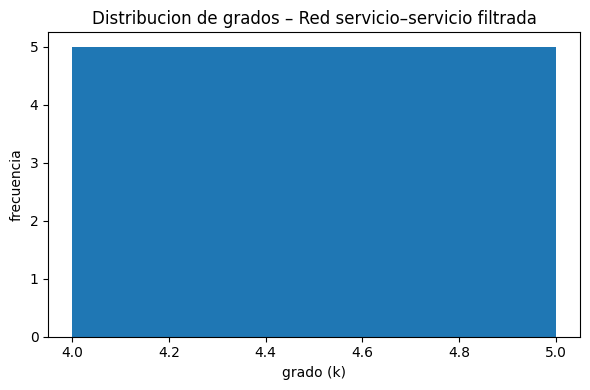

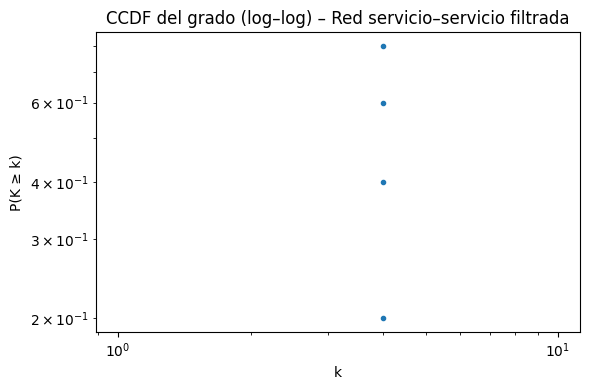

Primeros valores de la CCDF para Red servicio–servicio filtrada


,grado_k,P(K>=k)
0,4,0.8
1,4,0.6
2,4,0.4
3,4,0.2
4,4,0.0



Resumen estadistico de grados para Red tarea–tarea filtrada


,grado
count,10.000000
mean,7.800000
std,1.316561
min,5.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,9.000000


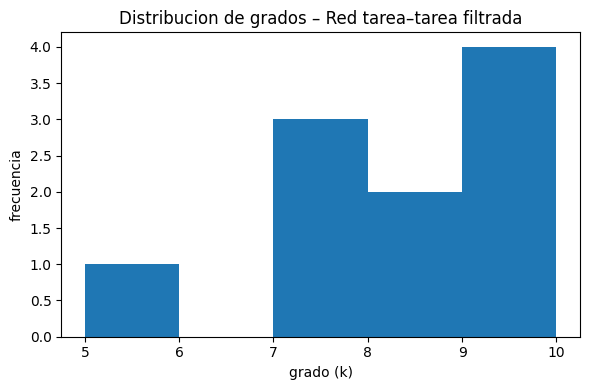

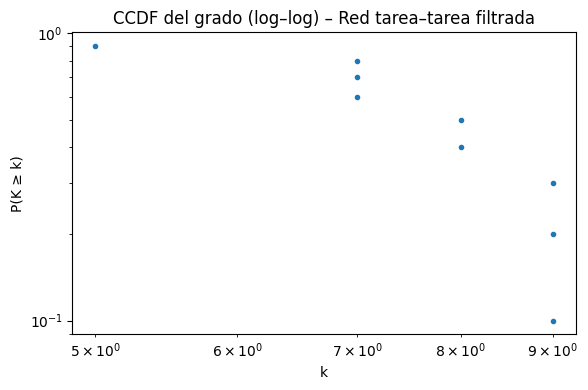

Primeros valores de la CCDF para Red tarea–tarea filtrada


,grado_k,P(K>=k)
0,5,0.9
1,7,0.8
2,7,0.7
3,7,0.6
4,8,0.5
5,8,0.4
6,9,0.3
7,9,0.2
8,9,0.1
9,9,0.0


In [8]:
# ============================
# Métricas locales: grado y CCDF
# ============================

plot_grado_y_ccdf(G_servicios_filtrada, "Red servicio–servicio filtrada")
plot_grado_y_ccdf(G_tareas_filtrada, "Red tarea–tarea filtrada")


---

### **Red servicio–servicio filtrada**

Todos los servicios tienen exactamente el mismo grado (4), lo que confirma que la red es completamente conectada y homogénea. La distribución de grados no muestra variación y la CCDF cae de manera lineal, reflejando que no existen servicios más dominantes que otros dentro del subconjunto filtrado. Esto indica un uso altamente consistente: los servicios filtrados tienden a aparecer juntos en prácticamente todas las combinaciones relevantes.

---

### **Red tarea–tarea filtrada**

Los grados presentan mayor variabilidad (entre 5 y 9), lo que muestra que algunas tareas están más conectadas que otras. La distribución es más amplia y la CCDF desciende de forma más gradual, indicando la presencia de tareas con mayor capacidad de co-aparición. Esto refleja que, aunque la red sigue siendo muy cohesionada, existe una jerarquía de conexión: ciertas tareas actúan como núcleos de interrelación mientras que otras se integran con menor intensidad.

---

### **Comparación general**

La red de servicios es completamente uniforme y altamente densa, mientras que la red de tareas presenta más diversidad en conectividad. Esto sugiere que los servicios filtrados forman un grupo cerrado y muy estable, mientras que las tareas revelan patrones más ricos y diferenciados de co-utilización, capturando mejor la estructura funcional del proceso de atención.



Centralidades en red servicio–servicio filtrada


,degree,closeness,betweenness,eigenvector,pagerank
nodo,,,,,
SERV_6,1.0,1.0,0.0,0.4472,0.0941
SERV_4,1.0,1.0,0.0,0.4472,0.1957
SERV_2,1.0,1.0,0.0,0.4472,0.3069
SERV_5,1.0,1.0,0.0,0.4472,0.1379
SERV_1,1.0,1.0,0.0,0.4472,0.2654


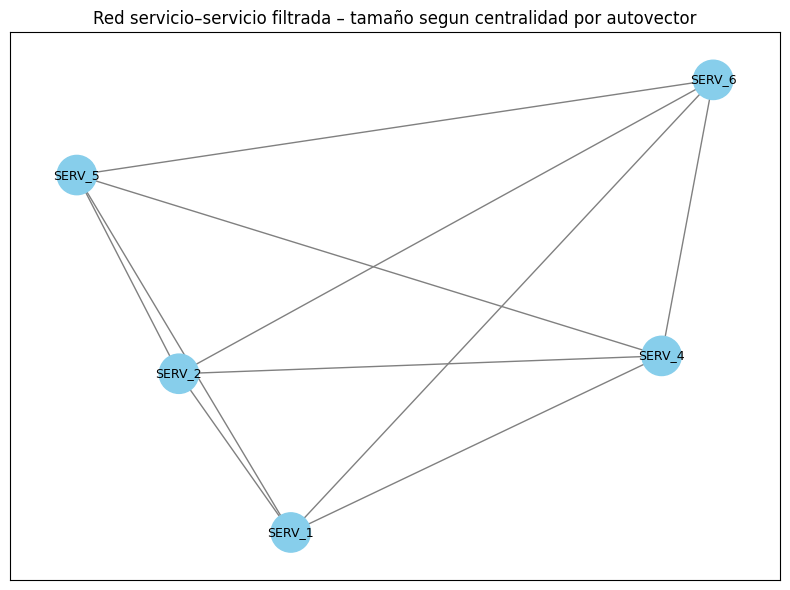


Centralidades en red tarea–tarea filtrada


,degree,closeness,betweenness,eigenvector,pagerank
nodo,,,,,
TAREA_6.1,1.0000,1.0000,0.0343,0.3496,0.0680
TAREA_4.1,1.0000,1.0000,0.0343,0.3496,0.0957
TAREA_2.1,1.0000,1.0000,0.0343,0.3496,0.1230
TAREA_5.1,1.0000,1.0000,0.0343,0.3496,0.0884
TAREA_2.2,0.8889,0.9000,0.0093,0.3260,0.1643
TAREA_4.3,0.8889,0.9000,0.0093,0.3260,0.0928
TAREA_1.2,0.7778,0.8182,0.0000,0.2944,0.1122
TAREA_1.1,0.7778,0.8182,0.0000,0.2944,0.1612
TAREA_5.2,0.7778,0.8182,0.0111,0.2839,0.0572


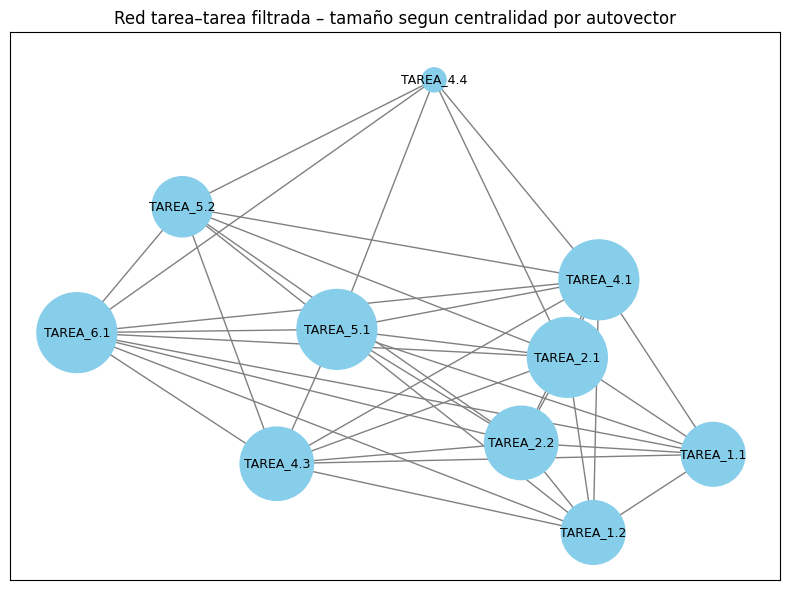


Top nodos mas centrales en servicios y tareas


,tipo,nodo,degree,closeness,betweenness,eigenvector,pagerank
0,servicio,SERV_6,1.000000,1.0,0.000000,0.447214,0.094149
1,servicio,SERV_4,1.000000,1.0,0.000000,0.447214,0.195659
2,servicio,SERV_2,1.000000,1.0,0.000000,0.447214,0.306908
3,servicio,SERV_5,1.000000,1.0,0.000000,0.447214,0.137885
4,servicio,SERV_1,1.000000,1.0,0.000000,0.447214,0.265400
5,tarea,TAREA_6.1,1.000000,1.0,0.034259,0.349596,0.067987
6,tarea,TAREA_4.1,1.000000,1.0,0.034259,0.349596,0.095746
7,tarea,TAREA_2.1,1.000000,1.0,0.034259,0.349596,0.122997
8,tarea,TAREA_5.1,1.000000,1.0,0.034259,0.349596,0.088368
9,tarea,TAREA_2.2,0.888889,0.9,0.009259,0.326039,0.164311


In [13]:
# ============================
# Centralidades y nodos clave
# ============================

print("\nCentralidades en red servicio–servicio filtrada")
df_cent_serv = centralidades_tabla(G_servicios_filtrada)
display(df_cent_serv.round(4).head(10))

visualizar_por_centralidad(
    G_servicios_filtrada,
    df_cent_serv,
    "Red servicio–servicio filtrada – tamaño segun centralidad por autovector"
)

print("\nCentralidades en red tarea–tarea filtrada")
df_cent_tareas = centralidades_tabla(G_tareas_filtrada)
display(df_cent_tareas.round(4).head(10))

visualizar_por_centralidad(
    G_tareas_filtrada,
    df_cent_tareas,
    "Red tarea–tarea filtrada – tamaño segun centralidad por autovector"
)

top_serv = df_cent_serv.head(5).copy()
top_serv["tipo"] = "servicio"
top_tareas = df_cent_tareas.head(5).copy()
top_tareas["tipo"] = "tarea"

df_top_comparado = pd.concat([
    top_serv.reset_index().rename(columns={"index": "nodo"}),
    top_tareas.reset_index().rename(columns={"index": "nodo"})
], ignore_index=True)

print("\nTop nodos mas centrales en servicios y tareas")
display(df_top_comparado[["tipo", "nodo", "degree", "closeness", "betweenness", "eigenvector", "pagerank"]])

---

### **Centralidades en la red servicio–servicio filtrada**

Todos los servicios muestran exactamente los mismos valores de centralidad, lo que confirma que el subgrupo filtrado forma un *clique* completamente conectado. Ningún servicio actúa como puente ni destaca por influencia, porque todos tienen la misma posición estructural. Esto refleja un patrón de co-utilización totalmente uniforme: los mismos servicios aparecen juntos y ninguno cumple un rol más estratégico que otro.

---

### **Centralidades en la red tarea–tarea filtrada**

A diferencia de los servicios, las tareas sí presentan variación en centralidad. Tareas como **TAREA_6.1, TAREA_4.1, TAREA_2.1 y TAREA_5.1** aparecen como las más influyentes según eigenvector y closeness, lo que indica que están conectadas con muchas otras tareas igualmente relevantes. Las tareas con menor centralidad igual siguen integradas, pero ocupan posiciones más periféricas. Esto muestra una estructura más rica y jerárquica en la red de tareas.

---

### **Comparación conjunta**

La red de servicios es completamente simétrica, sin nodos clave, mientras que la red de tareas revela nodos centrales que estructuran la co-aparición de procesos. En conjunto, los resultados sugieren que los servicios filtrados operan como un bloque único y estable, mientras que las tareas capturan mejor la variabilidad y los roles diferenciados dentro del sistema.



Comunidades en servicios (Girvan–Newman)
Comunidades detectadas en servicios:
Comunidad 1: 1 servicios
Comunidad 2: 4 servicios


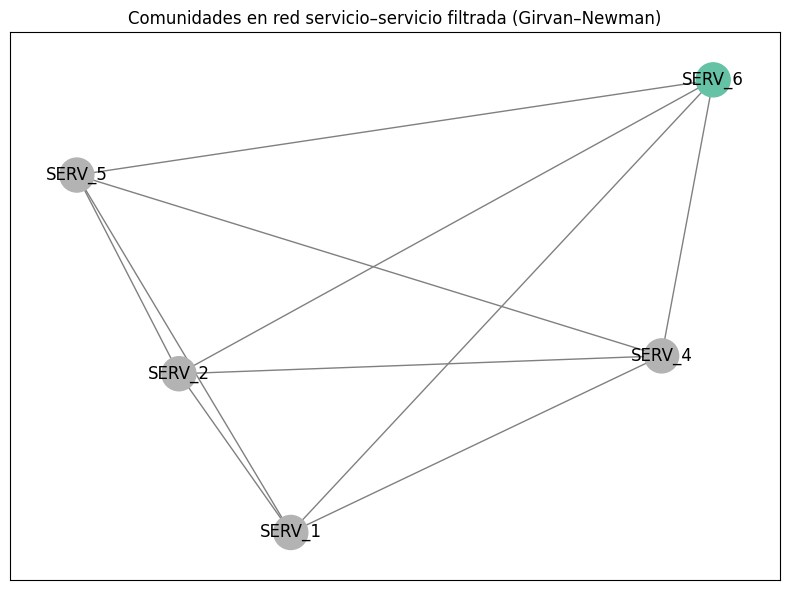


Comunidades en tareas (Louvain)
Modularidad de la particion en tareas: 0.1398
Comunidades detectadas en tareas:
Comunidad 0: 3 tareas
Comunidad 1: 7 tareas


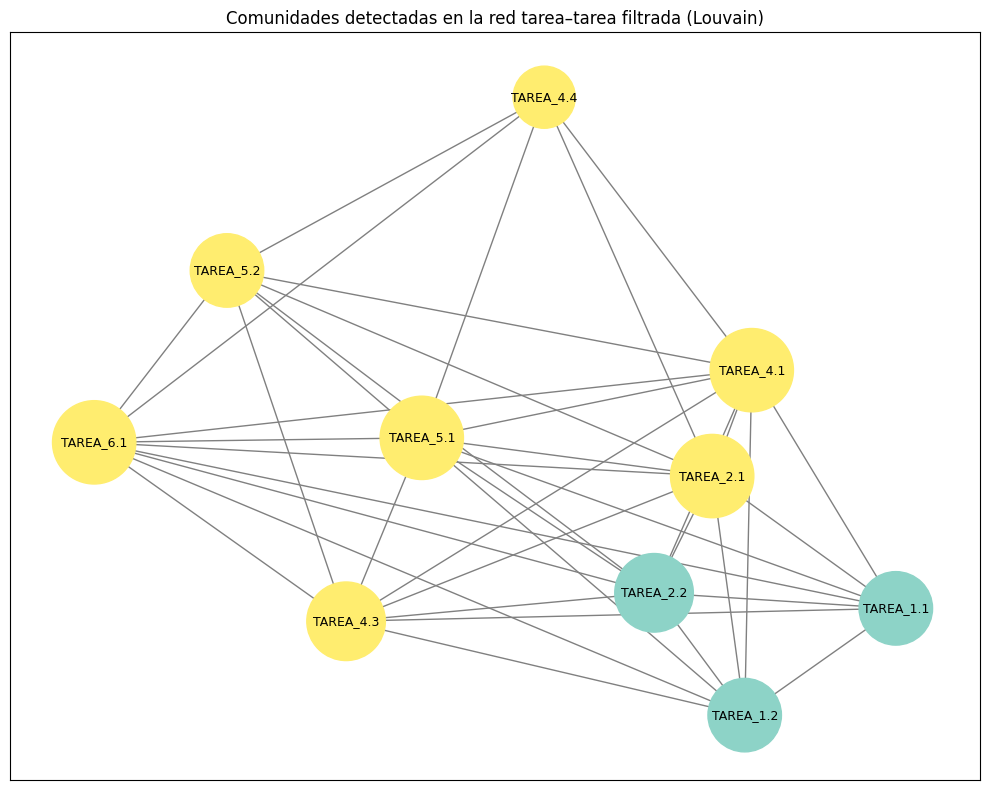

In [14]:
# ============================
# Detección de comunidades
# ============================

from networkx.algorithms.community import girvan_newman

# Comunidades en servicios con Girvan–Newman
print("\nComunidades en servicios (Girvan–Newman)")

if G_servicios_filtrada.number_of_nodes() > 0 and G_servicios_filtrada.number_of_edges() > 0:
    comp_generator = girvan_newman(G_servicios_filtrada)
    comunidades_serv = tuple(sorted(c) for c in next(comp_generator))
    comunidades_serv = [set(c) for c in comunidades_serv]

    print("Comunidades detectadas en servicios:")
    for idx, com in enumerate(comunidades_serv):
        print(f"Comunidad {idx+1}: {len(com)} servicios")

    pos_serv = nx.spring_layout(G_servicios_filtrada, seed=42)
    plt.figure(figsize=(8,6))
    colores = []
    for n in G_servicios_filtrada.nodes():
        color = 0
        for idx, com in enumerate(comunidades_serv):
            if n in com:
                color = idx
                break
        colores.append(color)
    nx.draw_networkx(
        G_servicios_filtrada,
        pos=pos_serv,
        node_color=colores,
        cmap="Set2",
        with_labels=True,
        node_size=600,
        edge_color="gray"
    )
    plt.title("Comunidades en red servicio–servicio filtrada (Girvan–Newman)")
    plt.tight_layout()
    plt.show()
else:
    print("La red de servicios filtrada no tiene suficientes nodos o enlaces para Girvan–Newman.")

# Comunidades en tareas con Louvain
print("\nComunidades en tareas (Louvain)")

partition_tareas = community_louvain.best_partition(G_tareas_filtrada, weight="weight")
nx.set_node_attributes(G_tareas_filtrada, partition_tareas, "comunidad")

mod_tareas = community_louvain.modularity(partition_tareas, G_tareas_filtrada)
print("Modularidad de la particion en tareas:", round(mod_tareas, 4))

comunidades_tareas = {}
for nodo, com in partition_tareas.items():
    comunidades_tareas.setdefault(com, []).append(nodo)

print("Comunidades detectadas en tareas:")
for com_id, nodos in comunidades_tareas.items():
    print(f"Comunidad {com_id}: {len(nodos)} tareas")

pos_tareas = nx.spring_layout(G_tareas_filtrada, seed=42)
colores_tareas = [partition_tareas[n] for n in G_tareas_filtrada.nodes()]
tam_nodos = [G_tareas_filtrada.degree(n) * 400 for n in G_tareas_filtrada.nodes()]

plt.figure(figsize=(10,8))
nx.draw_networkx(
    G_tareas_filtrada,
    pos=pos_tareas,
    node_color=colores_tareas,
    cmap="Set3",
    node_size=tam_nodos,
    edge_color="gray",
    with_labels=True,
    font_size=9
)
plt.title("Comunidades detectadas en la red tarea–tarea filtrada (Louvain)")
plt.tight_layout()
plt.show()

---

### **Comunidades en servicios (Girvan–Newman)**

La red servicio–servicio filtrada es prácticamente un *clique*, por lo que Girvan–Newman solo logra separar un nodo individual del resto. Esta partición no indica comunidades reales, sino que refleja que la red es demasiado pequeña y completamente conectada; no hay estructura modular ni agrupamientos diferenciados. En otras palabras, los servicios filtrados se comportan como un bloque único sin separación funcional.

---

### **Comunidades en tareas (Louvain)**

En la red tarea–tarea filtrada, Louvain detecta dos grupos: una comunidad grande de siete tareas y una comunidad pequeña de tres. La modularidad es baja, lo que indica que la separación no es fuerte, pero aun así sugiere cierta diferenciación en los patrones de co-utilización. Las tareas del grupo mayor aparecen más frecuentemente juntas y forman el núcleo operativo, mientras que las del grupo pequeño se conectan con menor intensidad, mostrando un rol más complementario o especializado dentro del conjunto.

---

### **Comparación general**

Mientras que los servicios no muestran estructura comunitaria debido a su conexión homogénea, las tareas sí presentan una organización más rica, con un núcleo denso y un subconjunto periférico. Esto confirma que la red de tareas captura mejor variaciones funcionales y patrones de uso que la red de servicios.


In [15]:
# ============================
# Mezcla y asortatividad en tareas
# ============================

print("\nAsortatividad y mezcla en la red de tareas")

r_degree = nx.degree_assortativity_coefficient(G_tareas_filtrada)
print("Asortatividad por grado:", round(r_degree, 4))

r_comm = nx.attribute_assortativity_coefficient(G_tareas_filtrada, "comunidad")
print("Asortatividad por comunidad:", round(r_comm, 4))

comunidades_ids = sorted(set(partition_tareas.values()))
indice = {c: i for i, c in enumerate(comunidades_ids)}
M = np.zeros((len(comunidades_ids), len(comunidades_ids)), dtype=int)

for u, v in G_tareas_filtrada.edges():
    cu = G_tareas_filtrada.nodes[u]["comunidad"]
    cv = G_tareas_filtrada.nodes[v]["comunidad"]
    i = indice[cu]
    j = indice[cv]
    M[i, j] += 1
    if i != j:
        M[j, i] += 1

df_mix = pd.DataFrame(M, index=comunidades_ids, columns=comunidades_ids)
print("\nMatriz de mezcla entre comunidades (tareas)")
display(df_mix)


Asortatividad y mezcla en la red de tareas
Asortatividad por grado: -0.2745
Asortatividad por comunidad: -0.013

Matriz de mezcla entre comunidades (tareas)


,0,1
0,3,16
1,16,20


La asortatividad por grado negativa indica que las tareas más conectadas suelen vincularse con tareas menos conectadas, en lugar de formar un grupo de nodos altamente conectados entre sí. Esto sugiere una estructura donde los nodos centrales actúan como puentes hacia nodos más periféricos, repartiendo la conectividad y evitando la formación de un núcleo cerrado.

La asortatividad por comunidad cercana a cero, junto con la matriz de mezcla, muestra que las dos comunidades detectadas no están claramente separadas: existe una cantidad considerable de conexiones entre ambos grupos. Esto indica que, aunque hay cierta división modular, en la práctica las tareas interactúan de manera bastante integrada, sin una preferencia fuerte por conectarse dentro o fuera de su propia comunidad.



Neighborhood Overlap en la red de tareas


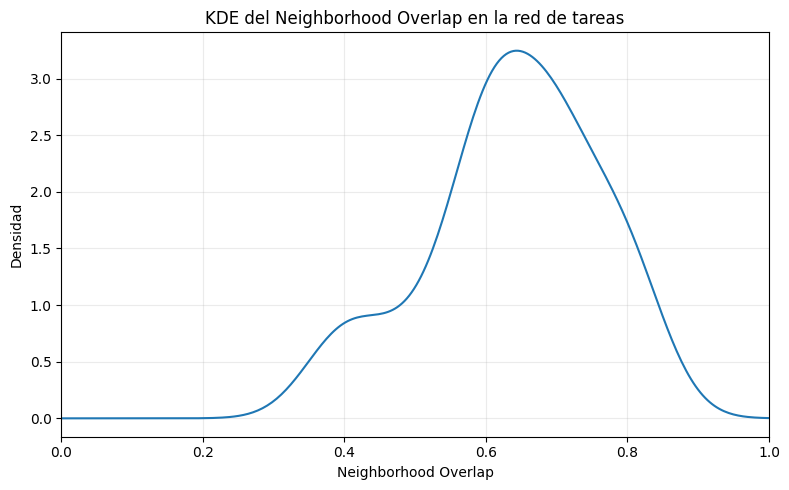

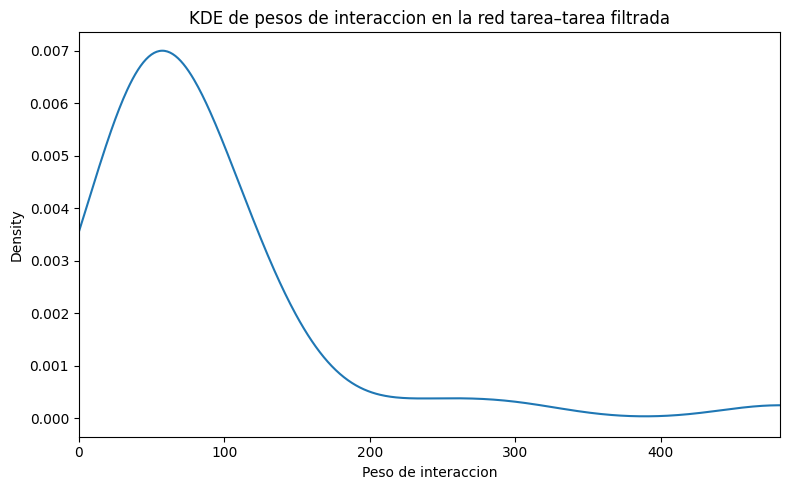

In [16]:
# ============================
# Neighborhood Overlap y pesos
# ============================

print("\nNeighborhood Overlap en la red de tareas")

for u, v in G_tareas_filtrada.edges():
    vecinos_u = set(G_tareas_filtrada.neighbors(u))
    vecinos_v = set(G_tareas_filtrada.neighbors(v))
    inter = len(vecinos_u & vecinos_v)
    union = len(vecinos_u | vecinos_v)
    overlap = inter / union if union > 0 else 0
    G_tareas_filtrada[u][v]["overlap"] = overlap

overlaps = np.array([d["overlap"] for _, _, d in G_tareas_filtrada.edges(data=True)])

kde_overlap = gaussian_kde(overlaps)
x_full = np.linspace(0, 1, 300)
y_full = kde_overlap(x_full)

plt.figure(figsize=(8,5))
plt.plot(x_full, y_full)
plt.xlabel("Neighborhood Overlap")
plt.ylabel("Densidad")
plt.title("KDE del Neighborhood Overlap en la red de tareas")
plt.xlim(0, 1)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

weights_tareas = [d["weight"] for _, _, d in G_tareas_filtrada.edges(data=True)]
weights_tareas = np.array(weights_tareas)

plt.figure(figsize=(8,5))
pd.Series(weights_tareas).plot.kde()
plt.xlabel("Peso de interaccion")
plt.title("KDE de pesos de interaccion en la red tarea–tarea filtrada")
plt.xlim(0, weights_tareas.max())
plt.tight_layout()
plt.show()

KDE del Neighborhood Overlap

La distribución del neighborhood overlap se concentra entre 0.5 y 0.8, con un pico cerca de 0.65. Esto significa que la mayoría de pares de tareas conectadas comparten una gran proporción de vecinos en común. En términos funcionales, las tareas que aparecen juntas tienden a participar en contextos muy similares, mostrando una estructura altamente redundante y cohesiva. Los valores bajos son pocos, lo que confirma que casi no existen enlaces aislados o relaciones débiles.

KDE de los pesos de interacción

La distribución de pesos presenta un pico inicial en valores bajos (alrededor de 30–60), pero una cola larga hacia la derecha con pesos que alcanzan más de 400. Esto indica que, aunque muchas tareas se relacionan entre sí con una intensidad moderada, existe un subconjunto de pares de tareas que se co-utilizan de manera muy frecuente, actuando como combinaciones centrales del proceso. Esta mezcla de muchos enlaces medianos y pocos enlaces extremadamente fuertes es típica de redes donde ciertos nodos asumen roles dominantes en la estructura de interacción.


Comparacion temporal de redes proyectadas por año

Evolucion de la proyeccion servicio–servicio por año


,anio,n_nodos,m_enlaces,densidad
1,2019,1,0,NaN
3,2020,7,13,0.619048
5,2021,7,18,0.857143
4,2022,7,13,0.619048
0,2023,7,15,0.714286
2,2024,7,14,0.666667



Evolucion de la proyeccion tarea–tarea por año


,anio,n_nodos,m_enlaces,densidad
5,2019,1,0,NaN
0,2020,10,28,0.622222
2,2021,11,33,0.600000
4,2022,11,28,0.509091
1,2023,16,57,0.475000
3,2024,13,51,0.653846


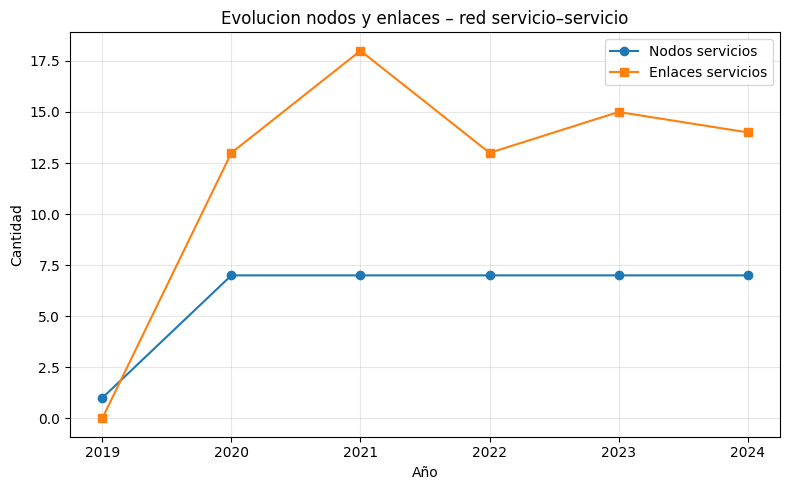

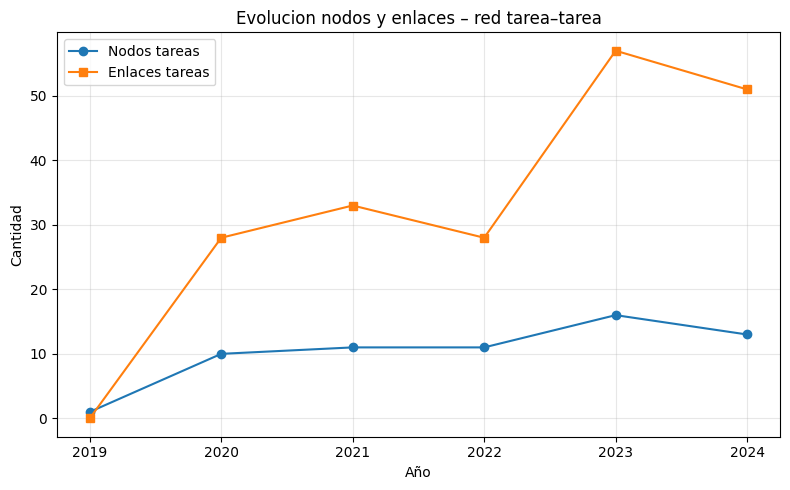

In [17]:
# ============================
# Comparaciones temporales
# ============================

print("\nComparacion temporal de redes proyectadas por año")

registros_servicios = []
registros_tareas = []

for archivo in os.listdir(carpeta_por_anio):
    ruta = os.path.join(carpeta_por_anio, archivo)
    if archivo.startswith("red_servicio_servicio_") and archivo.endswith(".pkl"):
        anio = int(archivo.split("_")[-1].split(".")[0])
        with open(ruta, "rb") as f:
            G_an = pickle.load(f)
        registros_servicios.append({
            "anio": anio,
            "n_nodos": G_an.number_of_nodes(),
            "m_enlaces": G_an.number_of_edges(),
            "densidad": nx.density(G_an) if G_an.number_of_nodes() > 1 else np.nan
        })
    if archivo.startswith("red_tarea_tarea_") and archivo.endswith(".pkl"):
        anio = int(archivo.split("_")[-1].split(".")[0])
        with open(ruta, "rb") as f:
            G_an = pickle.load(f)
        registros_tareas.append({
            "anio": anio,
            "n_nodos": G_an.number_of_nodes(),
            "m_enlaces": G_an.number_of_edges(),
            "densidad": nx.density(G_an) if G_an.number_of_nodes() > 1 else np.nan
        })

df_temporal_serv = pd.DataFrame(registros_servicios).sort_values("anio")
df_temporal_tareas = pd.DataFrame(registros_tareas).sort_values("anio")

print("\nEvolucion de la proyeccion servicio–servicio por año")
display(df_temporal_serv)

print("\nEvolucion de la proyeccion tarea–tarea por año")
display(df_temporal_tareas)

plt.figure(figsize=(8,5))
plt.plot(df_temporal_serv["anio"], df_temporal_serv["n_nodos"], marker="o", label="Nodos servicios")
plt.plot(df_temporal_serv["anio"], df_temporal_serv["m_enlaces"], marker="s", label="Enlaces servicios")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.title("Evolucion nodos y enlaces – red servicio–servicio")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df_temporal_tareas["anio"], df_temporal_tareas["n_nodos"], marker="o", label="Nodos tareas")
plt.plot(df_temporal_tareas["anio"], df_temporal_tareas["m_enlaces"], marker="s", label="Enlaces tareas")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.title("Evolucion nodos y enlaces – red tarea–tarea")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

### **Evolución de la red servicio–servicio**

El número de servicios activos en la red se estabiliza rápidamente a partir de 2020, manteniéndose en 7 nodos durante todo el periodo. Lo que sí varía es la cantidad de enlaces, que aumenta notablemente en 2020 y alcanza su punto máximo en 2021, indicando un año donde los servicios fueron utilizados juntos con mayor frecuencia. A partir de 2022 los enlaces disminuyen ligeramente, aunque se mantienen altos, lo que sugiere que la co-utilización entre servicios sigue siendo consistente pese a fluctuaciones en intensidad.

---

### **Evolución de la red tarea–tarea**

La red de tareas muestra mayor dinamismo. El número de nodos crece hasta 2023 y luego disminuye, reflejando que ciertos años incorporan más tipos de tareas. Los enlaces presentan variaciones más marcadas, con un incremento importante en 2023, donde se observa la mayor densidad de co-aparición entre tareas. Esto indica que ese periodo tuvo procesos más integrados o más repetitivos, donde muchas tareas se ejecutaron juntas de forma sistemática. Aunque en 2024 el número de enlaces baja, sigue siendo superior al de los primeros años, señalando una tendencia sostenida hacia interacciones complejas.

---
